# Problem Statement

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data provided contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

# Data Understanding

In this section, we will try to get an initial understanding of the data provided.

In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set required options 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
sns.set_style("whitegrid")

In [3]:
# Load the loan data from CSV
loan_data = pd.read_csv('loan.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# Load Data Dictionary
loan_data_dictionary = pd.read_excel('Data_Dictionary.xlsx')
loan_data_dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


## Dataframe Summary

Check details of the dataframe like how many rows and how many columns are present.

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


As per above the dataframe have 39717 rows with 111 columns each.

In [6]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

The summary metrics of all columns are shown above.

### Column Types

The type of each column in the original dataframe is shown below.

In [7]:
loan_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

## Check Null Value Counts

Analyse the null values in the dataframe

In [8]:
# Checking all the columns with null values
null_count = loan_data.isnull().sum()
null_count[null_count > 0].sort_values(ascending=False)

bc_open_to_buy                    39717
acc_open_past_24mths              39717
bc_util                           39717
mo_sin_old_il_acct                39717
mo_sin_old_rev_tl_op              39717
mo_sin_rcnt_rev_tl_op             39717
mo_sin_rcnt_tl                    39717
mort_acc                          39717
mths_since_recent_bc              39717
mths_since_recent_bc_dlq          39717
mths_since_recent_inq             39717
mths_since_recent_revol_delinq    39717
num_accts_ever_120_pd             39717
num_actv_bc_tl                    39717
num_actv_rev_tl                   39717
num_bc_sats                       39717
num_bc_tl                         39717
num_il_tl                         39717
num_op_rev_tl                     39717
num_rev_accts                     39717
num_rev_tl_bal_gt_0               39717
num_sats                          39717
num_tl_120dpd_2m                  39717
num_tl_30dpd                      39717
num_tl_90g_dpd_24m                39717


# Data Cleanup

In this section we will clean up the data.

## Missing Value Handling

Drop columns and rows which are having significant number of missing values.

### Drop Null Columns
We have seen above that few of the rows have significant number of null values. We can drop these columns as these won't add any meaningful information to our analysis. We will consider the columns having only less than 90% values as null.

Columns having more than 90% rows having null values are below

In [9]:
missing_values = round((loan_data.isnull().sum()/len(loan_data.id))*100, 2)
missing_values_90_percent = missing_values[missing_values>90].sort_values(ascending=False)
missing_values_90_percent

mo_sin_old_rev_tl_op              100.00
num_op_rev_tl                     100.00
mort_acc                          100.00
mths_since_recent_bc              100.00
mths_since_recent_bc_dlq          100.00
mths_since_recent_inq             100.00
mths_since_recent_revol_delinq    100.00
num_accts_ever_120_pd             100.00
num_actv_bc_tl                    100.00
num_actv_rev_tl                   100.00
num_bc_sats                       100.00
num_bc_tl                         100.00
num_il_tl                         100.00
num_rev_accts                     100.00
mo_sin_rcnt_rev_tl_op             100.00
num_rev_tl_bal_gt_0               100.00
num_sats                          100.00
num_tl_120dpd_2m                  100.00
num_tl_30dpd                      100.00
num_tl_90g_dpd_24m                100.00
num_tl_op_past_12m                100.00
pct_tl_nvr_dlq                    100.00
percent_bc_gt_75                  100.00
tot_hi_cred_lim                   100.00
total_bal_ex_mor

We can safely drop the above columns as majority of the values are null and hence won't give any useful insights during analysis.

In [10]:
loan_data = loan_data.drop(missing_values_90_percent.index, axis=1)
print('Dropped %d columns' % len(missing_values_90_percent.index.to_list()))

Dropped 56 columns


Verify that the missing values in columns is less than 90%

In [11]:
missing_values = round((loan_data.isnull().sum()/len(loan_data.id))*100, 2)
missing_values = pd.DataFrame(missing_values[missing_values>0], columns=["missing_value_percentage"])
missing_values.sort_values(by=["missing_value_percentage"], ascending=False)

,missing_value_percentage
mths_since_last_delinq,64.66
desc,32.58
emp_title,6.19
emp_length,2.71
pub_rec_bankruptcies,1.75
last_pymnt_d,0.18
collections_12_mths_ex_med,0.14
chargeoff_within_12_mths,0.14
revol_util,0.13
tax_liens,0.10


mths_since_last_delinq is having 64% null values. This column is part of customer's loan behavior and can be dropped. We will drop the column as part of the filteration section below.

### Drop Columns Having Same Value for All Rows

Some of the columns would be having same value for all the rows and hence not useful for analysis. These columns can be dropped.

In [12]:
columns_with_unique_value_counts = loan_data.nunique().sort_values(ascending=True)
columns_with_unique_value_counts

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

Any columns with only one value can be dropped.

Below check shows the columns with single values.

In [13]:
# Finding columns with unique values
columns_with_single_value = columns_with_unique_value_counts[columns_with_unique_value_counts == 1]
print(columns_with_single_value)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
dtype: int64


The above columns can be dropped from the dataframe as they are having a single value for all rows

In [14]:
# Dropping columns with unique values
loan_data = loan_data.drop(columns=columns_with_single_value.index)
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,13,0,7274,13.10%,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,6,0,8847,26.90%,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,11,0,9698,19.40%,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,17,

### Drop Null Rows

If any rows are having all values as null, we can drop those columns

In [15]:
# Checking how many rows are having all columns as null
loan_data.isnull().all(axis=1).sum()

0

We don't have any rows having all columns as null. So no need to drop any rows as part of this check.

## Standardising Values

Some fields would be having invalid values, which would make it difficult to analyze. We will clean this up in this section.

We can start by checking the type of each column

In [16]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

### Column - term

term is the number of payments to the loan. It represents the number of months the installment has to be paid. The type of this column is currently object.

In [17]:
loan_data['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

As seen in the value counts, terms is number of months. We can convert the value to integers. The column can also be renamed to indicate that it is number of months.

In [18]:
loan_data['term'] = loan_data['term'].apply(lambda x: int(str(x).replace(' months', '')))
loan_data = loan_data.rename(columns={'term': 'term_in_months'})
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Column - int_rate

Interest rate is a percentage value, but since the percentage symbol is present, its stored as an object. We can remove the percentage and convert to float.

In [19]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: float(str(x).replace('%', '')))

### Column - emp_length

This column indicates how many years of work experience the borrower have. We will start by checking the distinct values.

In [20]:
emp_length_counts = loan_data['emp_length'].value_counts(dropna=False)
emp_length_counts

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

#### Handle NaN
We can see that there are few NaN values for few rows. These have to be corrected. This could be because the the employment information is not available, or the person have no experience. We cannot confirm on this and we can drop the NaN rows if the number of rows dropped is not too high. 

First we will check the percentage of rows having NaN.

In [21]:
round(emp_length_counts[np.NaN] * 100 / len(loan_data['emp_length']), 2)

2.71

Since the number of rows are only 2.71% we can drop it and pick only the accurate rows for analysis.

In [22]:
loan_data = loan_data[~loan_data['emp_length'].isna()]
loan_data.shape

(38642, 46)

#### Convert Experiences to Int

We can convert the employment length to numeric value, representing the number of years. For 10+ we will provide the value as 10 and for <1 we will provide the value as 0.

In [23]:
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: int(str(x).replace(' years', '').replace(' year', '').replace('< 1', '0').replace('10+', '10')))
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Columns - issue_d

The issue_d column represent the month in which the loan is issued. We can convert it to proper date format. Since the day of the month is not provided, we can take 1st day of each month, just for completing the date format.

We can also derive the month and year as a separate column.

In [24]:
loan_data['issue_d'] = loan_data['issue_d'].apply(pd.to_datetime, format='%b-%y')
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_month'] = loan_data['issue_d'].dt.month
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,2011,12
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,2011,12
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,2011,12
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,2011,12
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,2011,12


## Filter Data

### Deduplicate Rows

If there are any duplicate rows in the dataset, these can result in incorrect results during analysis and these rows can hence be dropped. In the current dataset, all rows are having an id column. We can check the duplicates in id field to check this.

In [25]:
loan_data['id'].duplicated().sum()

0

As per the check above, there are no duplicate rows. Hence nothing need to be dropped.

### Exclude loan_status = Current

We can filter out rows where loan_status is Current. If the status is current, we are not yet sure whether the borrower is going to default or not. So these rows won't help in analysis.

In [26]:
existing_row_count = len(loan_data)
loan_data = loan_data[loan_data['loan_status'] != 'Current']
current_row_count = len(loan_data)
print('Dropped %d rows' % (existing_row_count - current_row_count))

Dropped 1098 rows


### Exclude Irrelavant Columns

The columns available are:

In [27]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       37544 non-null  int64         
 1   member_id                37544 non-null  int64         
 2   loan_amnt                37544 non-null  int64         
 3   funded_amnt              37544 non-null  int64         
 4   funded_amnt_inv          37544 non-null  float64       
 5   term_in_months           37544 non-null  int64         
 6   int_rate                 37544 non-null  float64       
 7   installment              37544 non-null  float64       
 8   grade                    37544 non-null  object        
 9   sub_grade                37544 non-null  object        
 10  emp_title                36136 non-null  object        
 11  emp_length               37544 non-null  int64         
 12  home_ownership           37544 n

The columns that can be dropped are:
* id: Id is a unique value which identify a loan. No information can be derived from id.
* member_id: Unique value to identify a person. No information can be derived from member_id.
* funded_amnt: This is a value determined after the loan is approved. Hence its not useful to predict if the borrower will default. The amount would be dec
* funded_amnt_inv: This is a value determined after the loan is approved. Hence its not useful to predict if the borrower will default.
* emp_title: This is a title of the person with regard to work. This has too many values to be for categorizing and there is no standard way to combine or compare two titles of people from different work streams.
* title: This is the loan title. This is again a description and it would be difficult to use this to find patterns.
* url: This is not a useful field as url only has an id field which is differing across rows. This id field cannot provide any relevant info.
* desc: This is a general description of the loan. This cannot be used for classifications. Purpose is a more standard and is similar to desc.
* zip_code: This field is masked. Hence cannot be used.
* sub_grade: This field is too granular. grade would be sufficient for analysis.
* verification_status: This is a parameter which depends on activity from LC. It would only validate whether the row is correct and wouldn't help in analysis.
* open_acc: This is the number of open loan accounts that the borrower have. In this analysis we are assuming that the user is new and wouldn't be having any prior accounts. Hence this can be dropped.
* Below attributes are affected by whether the loan is approved or not. Hence these cannot be relied on for analysis:
    * revol_bal
    * revol_util
    * out_prncp
    * out_prncp_inv
    * total_acc
    * recoveries
    * total_pymnt
    * total_pymnt_inv
    * total_rec_prncp
    * total_rec_int
    * total_rec_late_fee
    * collection_recovery_fee
    * last_pymnt_d
    * last_pymnt_amnt
    * last_credit_pull_d
    * earliest_credit_line
    * delinq_2yrs
    * delinq_2yrs
    * inq_last_6mths
    * open_acc
    * pub_rec_bankruptcies
    * mths_since_last_delinq

In [28]:
columns_to_be_dropped = [
    'id',
    'member_id',
    'funded_amnt',
    'funded_amnt_inv',
    'emp_title',
    'title',
    'url',
    'verification_status',
    'recoveries',
    'total_acc',
    'desc',
    'zip_code',
    'sub_grade',
    'revol_bal',
    'revol_util',
    'out_prncp',
    'out_prncp_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'collection_recovery_fee',
    'total_pymnt',
    'total_pymnt_inv',
    'earliest_cr_line',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d',
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'pub_rec_bankruptcies',
    'mths_since_last_delinq'
]
loan_data = loan_data.drop(columns=columns_to_be_dropped)
loan_data

,loan_amnt,term_in_months,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,pub_rec,issue_year,issue_month
0,5000,36,10.65,162.87,B,10,RENT,24000.0,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,2011,12
1,2500,60,15.27,59.83,C,0,RENT,30000.0,2011-12-01,Charged Off,car,GA,1.00,0,2011,12
2,2400,36,15.96,84.33,C,10,RENT,12252.0,2011-12-01,Fully Paid,small_business,IL,8.72,0,2011,12
3,10000,36,13.49,339.31,C,10,RENT,49200.0,2011-12-01,Fully Paid,other,CA,20.00,0,2011,12
5,5000,36,7.90,156.46,A,3,RENT,36000.0,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36,8.07,78.42,A,4,MORTGAGE,110000.0,2007-07-01,Fully Paid,home_improvement,CO,11.33,0,2007,7
39713,8500,36,10.28,275.38,C,3,RENT,18000.0,2007-07-01,Fully Paid,credit_card,NC,6.40,0,2007,7
39714,5000,36,8.07,156.84,A,0,MORTGAGE,100000.0,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,0,2007,7
39715,5000,36,7.43,155.38,A,0,MORTGAGE,200000.0,2007-07-01,Fully Paid,other,MD,3.72,0,2007,7


In [29]:
loan_data.dtypes

loan_amnt                  int64
term_in_months             int64
int_rate                 float64
installment              float64
grade                     object
emp_length                 int64
home_ownership            object
annual_inc               float64
issue_d           datetime64[ns]
loan_status               object
purpose                   object
addr_state                object
dti                      float64
pub_rec                    int64
issue_year                 int64
issue_month                int64
dtype: object

## Misc Corrections
Once the data is filtered, few more minor corrections can be done.

### Update Missing Values
Find and fix the missing values

In [30]:
loan_data.isnull().sum()

loan_amnt         0
term_in_months    0
int_rate          0
installment       0
grade             0
emp_length        0
home_ownership    0
annual_inc        0
issue_d           0
loan_status       0
purpose           0
addr_state        0
dti               0
pub_rec           0
issue_year        0
issue_month       0
dtype: int64

There are no more missing values.

# Handling Outliers

For each column, check if there are outliers and remove the outliers for more accurate analysis.

Before starting the outlier handling we can define a function which does the following:
* Finds the IQR
* Find the Upper (Max) and Lower (Min) bounds using the IQR.
* Remove outliers outside the Lower and Upper bounds above for the column

In [31]:
# IQR
def drop_outliers(dataframe, column):
    perc75 = dataframe[column].quantile(0.75)
    print('75th Percentile: %f' % perc75)
    perc25 = dataframe[column].quantile(0.25)
    print('25th Percentile: %f' % perc25)
    iqr = perc75-perc25
    print('IQR: %f' % iqr)
    lower_bound = perc25 - iqr * 1.5
    print('Lower Bound: %f' % lower_bound)
    upper_bound = perc75 + iqr * 1.5
    print('Upper Bound: %f' % upper_bound)
    current_rows = len(dataframe)
    dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    print('Dropped %s rows' % (current_rows - len(dataframe)))
    return dataframe    

## loan_amnt

Thie column represent the listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

<Axes: >

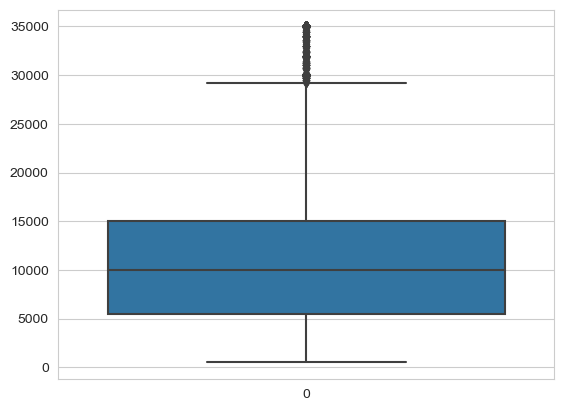

In [32]:
sns.boxplot(loan_data['loan_amnt'])

From above box plot we can see that there are some outliers present. We can attempt to remove those.

In [33]:
loan_data = drop_outliers(loan_data, 'loan_amnt')

75th Percentile: 15000.000000
25th Percentile: 5500.000000
IQR: 9500.000000
Lower Bound: -8750.000000
Upper Bound: 29250.000000
Dropped 1078 rows


<Axes: >

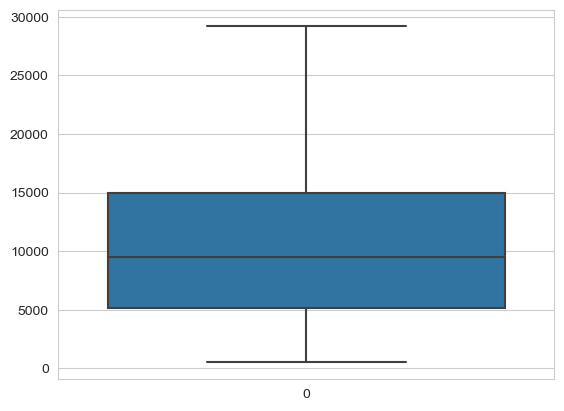

In [34]:
sns.boxplot(loan_data['loan_amnt'])

### int_rate

This field represents the interest rate.

We can start by a box plot on interest rate to understand the range of values

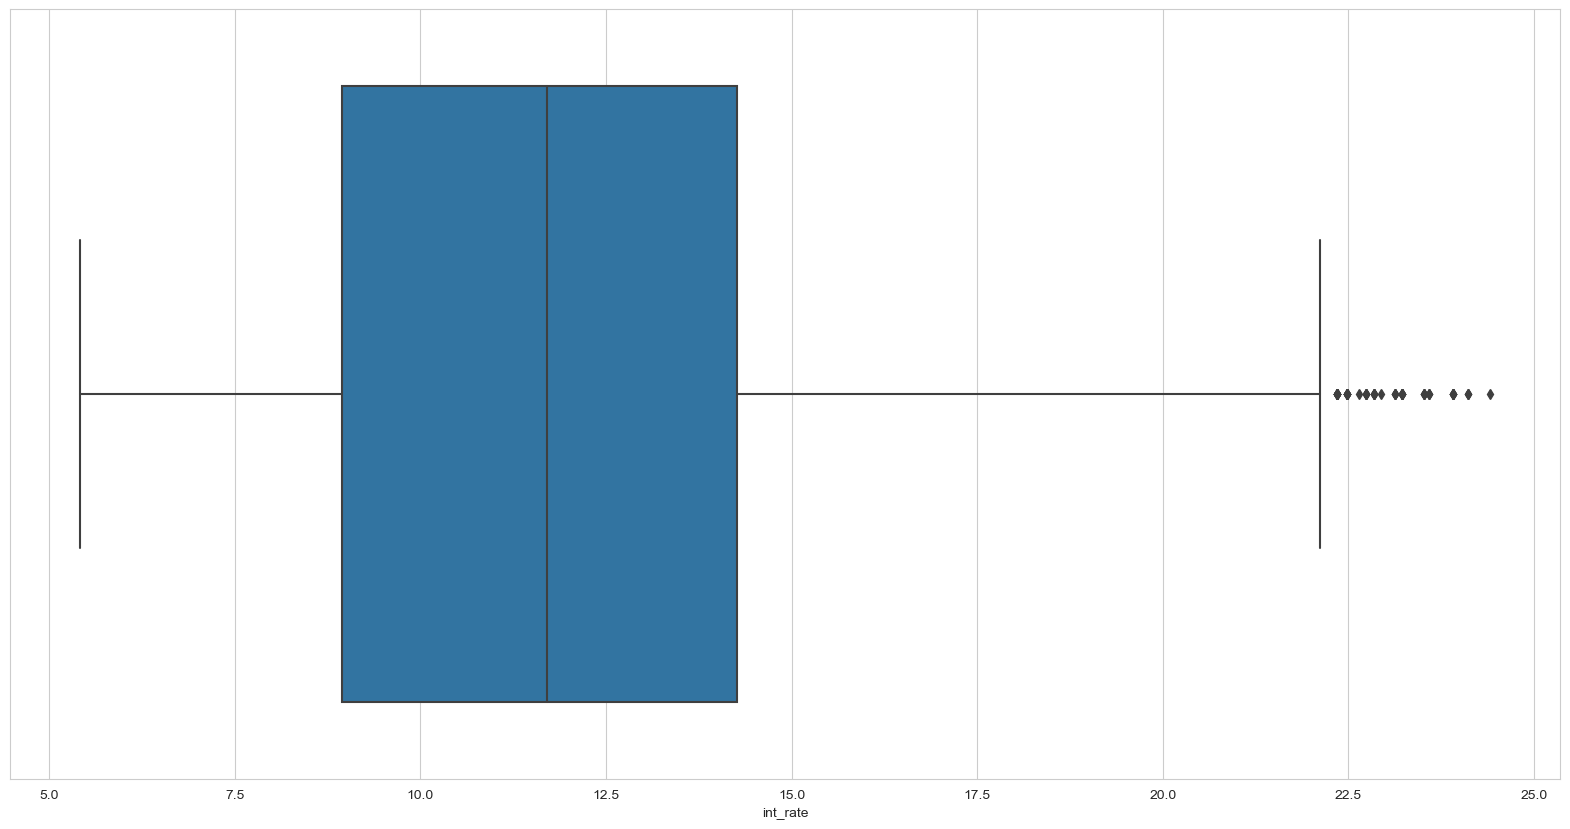

In [35]:
plt.figure(figsize=(20, 10 ))
sns.boxplot(data=loan_data, x='int_rate')
plt.show()

The above column has few outliers which can be removed

In [36]:
loan_data = drop_outliers(loan_data, 'int_rate')

75th Percentile: 14.270000
25th Percentile: 8.940000
IQR: 5.330000
Lower Bound: 0.945000
Upper Bound: 22.265000
Dropped 66 rows


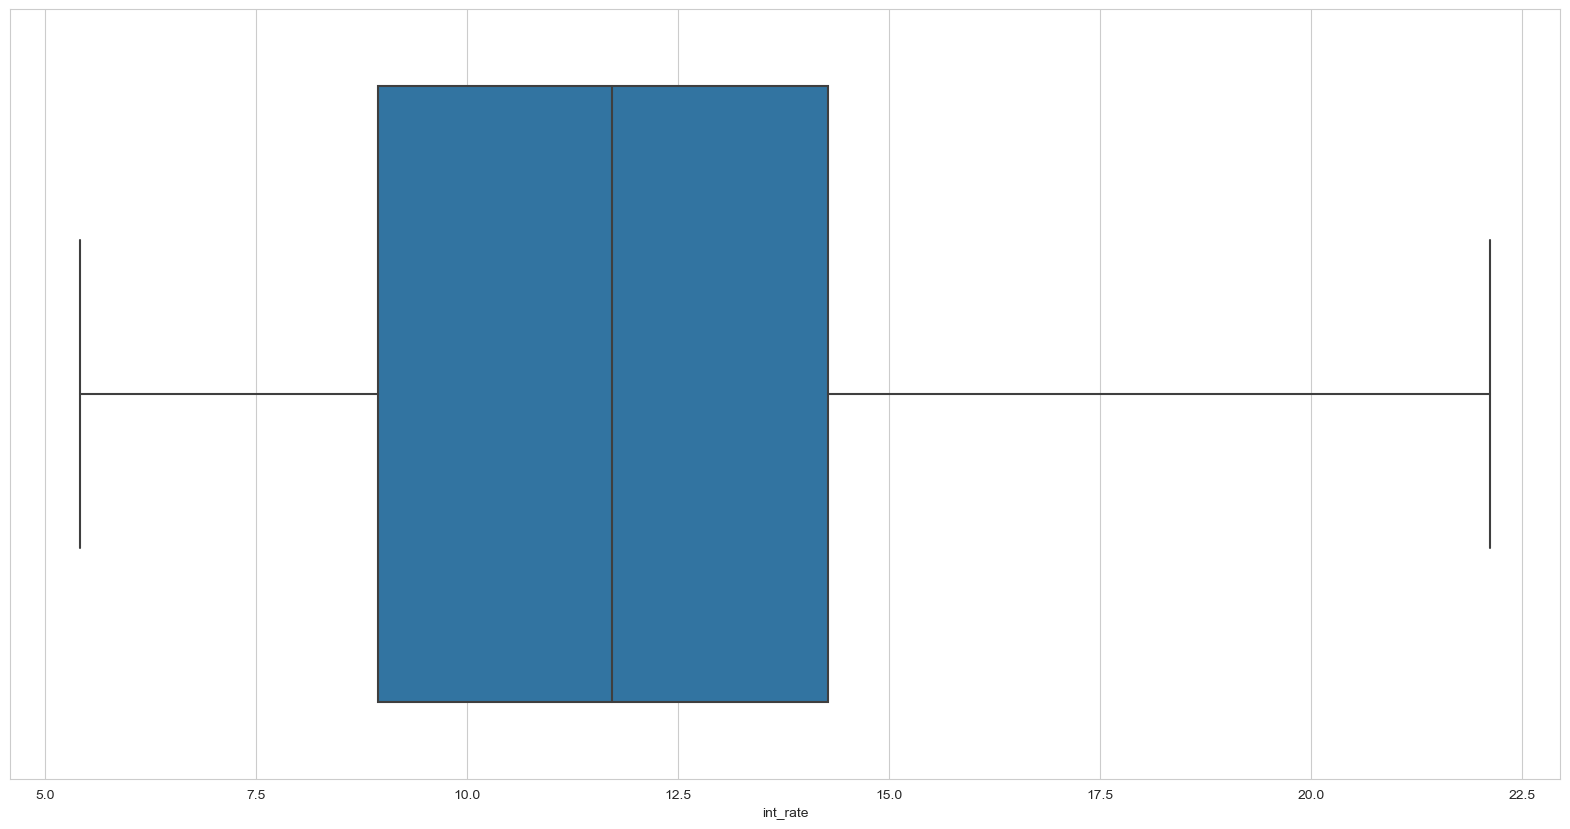

In [37]:
plt.figure(figsize=(20, 10 ))
sns.boxplot(data=loan_data, x='int_rate')
plt.show()

### annual_inc

This column represents the annual income of borrower.

We can check description of this column and also plot a boxplot.

<Axes: xlabel='annual_inc'>

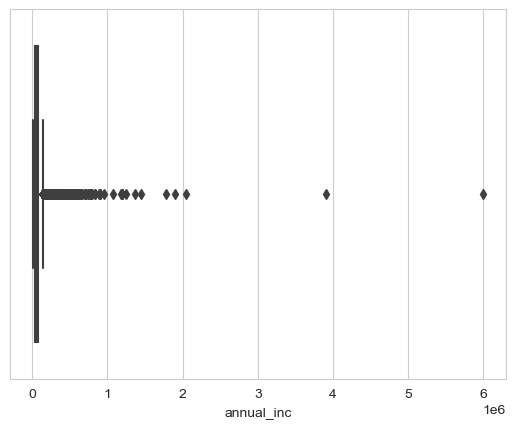

In [38]:
sns.boxplot(data = loan_data, x='annual_inc')

In [39]:
# Setting output as int since the float values are having exponents and not easily readable
loan_data['annual_inc'].describe().astype(int)

count      36400
mean       67707
std        63400
min         4000
25%        40000
50%        58000
75%        80000
max      6000000
Name: annual_inc, dtype: int64

From the above, we can see that there are outliers in the annual_inc field, which is very high compared to the 75th percentile. We have to remove the outliers.

In [40]:
loan_data = drop_outliers(loan_data, 'annual_inc')

75th Percentile: 80000.000000
25th Percentile: 40000.000000
IQR: 40000.000000
Lower Bound: -20000.000000
Upper Bound: 140000.000000
Dropped 1634 rows


<Axes: xlabel='annual_inc'>

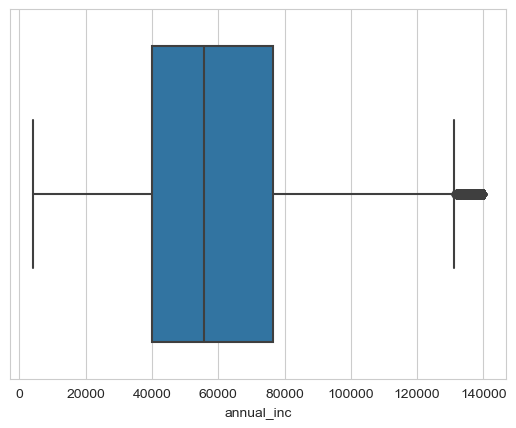

In [41]:
sns.boxplot(data = loan_data, x='annual_inc')

We can run the drop_outlierts again as there are few more outliers still present.

75th Percentile: 76404.000000
25th Percentile: 40000.000000
IQR: 36404.000000
Lower Bound: -14606.000000
Upper Bound: 131010.000000
Dropped 423 rows


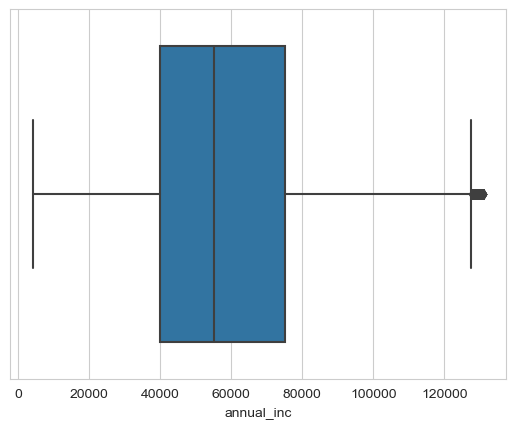

In [42]:
loan_data = drop_outliers(loan_data, 'annual_inc')
sns.boxplot(data = loan_data, x='annual_inc')
plt.show()

We can run the drop_outlierts again as there are few more outliers still present.

75th Percentile: 75000.000000
25th Percentile: 40000.000000
IQR: 35000.000000
Lower Bound: -12500.000000
Upper Bound: 127500.000000
Dropped 255 rows


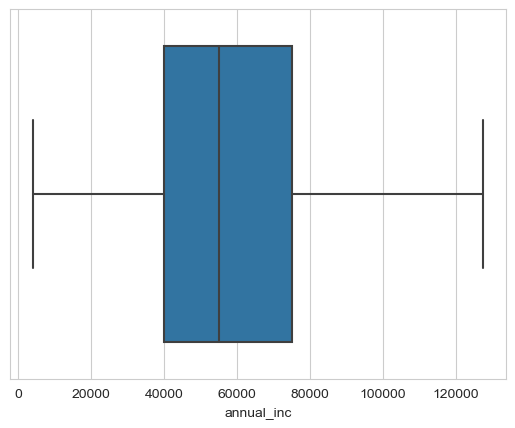

In [43]:
loan_data = drop_outliers(loan_data, 'annual_inc')
sns.boxplot(data = loan_data, x='annual_inc')
plt.show()

### installment

This field represent the amout which has to be paid back per month against the loan.

We will check for outliers in installment using a boxplot.

<Axes: xlabel='installment'>

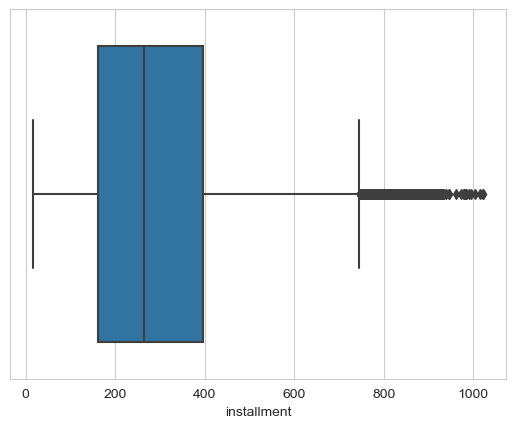

In [44]:
sns.boxplot(loan_data, x='installment')

As per the box plot, we can see that there are some outliers. We can remove the outliers using the function created already.

In [45]:
loan_data = drop_outliers(loan_data, 'installment')

75th Percentile: 395.660000
25th Percentile: 162.190000
IQR: 233.470000
Lower Bound: -188.015000
Upper Bound: 745.865000
Dropped 865 rows


<Axes: xlabel='installment'>

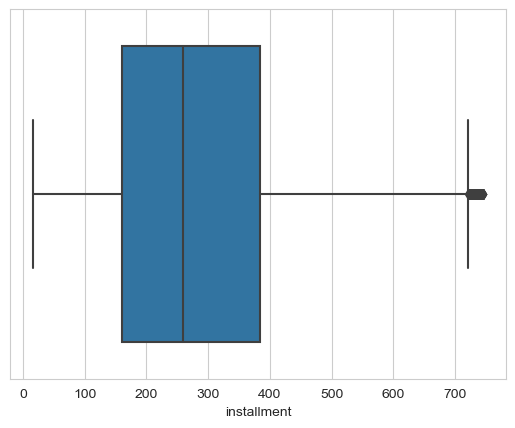

In [46]:
sns.boxplot(loan_data, x='installment')

We can still see few more outliers. We will drop those too using the same function again.

In [47]:
loan_data = drop_outliers(loan_data, 'installment')

75th Percentile: 384.465000
25th Percentile: 159.920000
IQR: 224.545000
Lower Bound: -176.897500
Upper Bound: 721.282500
Dropped 92 rows


<Axes: xlabel='installment'>

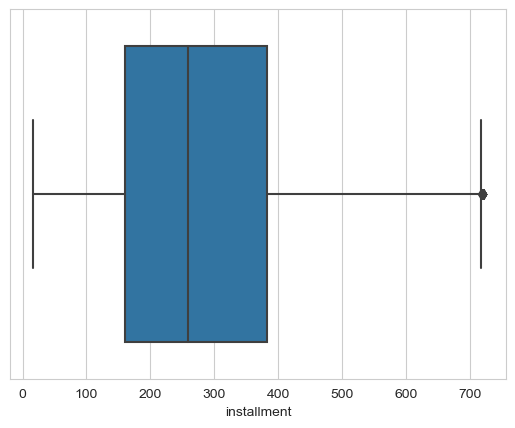

In [48]:
sns.boxplot(loan_data, x='installment')

We still have some more outliers. Dropping the remaining outliers again.

75th Percentile: 382.950000
25th Percentile: 159.740000
IQR: 223.210000
Lower Bound: -175.075000
Upper Bound: 717.765000
Dropped 27 rows


<Axes: xlabel='installment'>

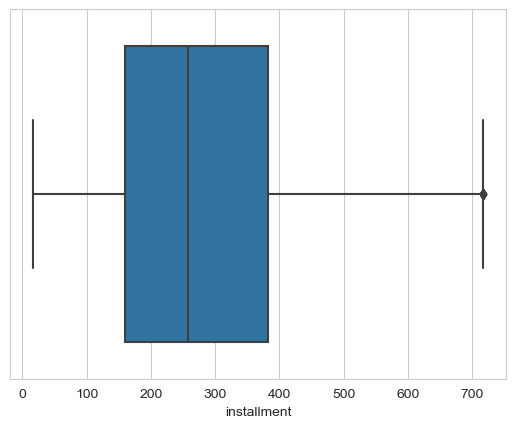

In [49]:
loan_data = drop_outliers(loan_data, 'installment')
sns.boxplot(loan_data, x='installment')

# Univariate Analysis

## Unordered Categorical Variables

We will try to plot some countplots and try to extract some useful information from the below categorical variables.

We would define a function to plot the percentage of entries which have been marked as Fully Paid and as Charged Off. This function would be useful in creating the plot for multiple variables.

In [50]:
def plot_percentage_bar(dataframe, group_by_col, vertical=False, figsize=(10,5), order_by_percentage=True, orient='v') :
    fig, ax = plt.subplots(figsize=figsize)
    grouped_df = dataframe.groupby(by=group_by_col)['loan_status'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    grouped_df = grouped_df.sort_values(['loan_status', 'Percentage'], ascending=[False, False])
    if order_by_percentage:
        order = grouped_df[group_by_col].drop_duplicates()
        if orient=='v':
            sns.barplot(x=group_by_col,y='Percentage',hue='loan_status',data=grouped_df, ax=ax, order=order, orient=orient)
        else:
            sns.barplot(y=group_by_col,x='Percentage',hue='loan_status',data=grouped_df, ax=ax, order=order, orient=orient)
    else:
        if orient=='v':
            sns.barplot(x=group_by_col,y='Percentage',hue='loan_status',data=grouped_df, ax=ax, orient=orient)
        else:
            sns.barplot(y=group_by_col,x='Percentage',hue='loan_status',data=grouped_df, ax=ax, orient=orient)
    for p in ax.patches:
        txt = str( p.get_height().round(2)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()
        if vertical:
            ax.text(txt_x,txt_y,txt, rotation=90)
        else:
            ax.text(txt_x,txt_y,txt)

We can also create a function to generate pivot tables.

In [51]:
def generate_pivot(dataframe, groupbycolumn, countcolumn):
    home_ownership_pivot = dataframe.groupby([groupbycolumn, 'loan_status']).count()[[countcolumn]].reset_index().pivot(index=groupbycolumn, columns='loan_status', values=countcolumn)
    return home_ownership_pivot.sort_values(by='Charged Off', ascending=False)

### home_ownership

This column mentions the type of home ownership for the borrower.

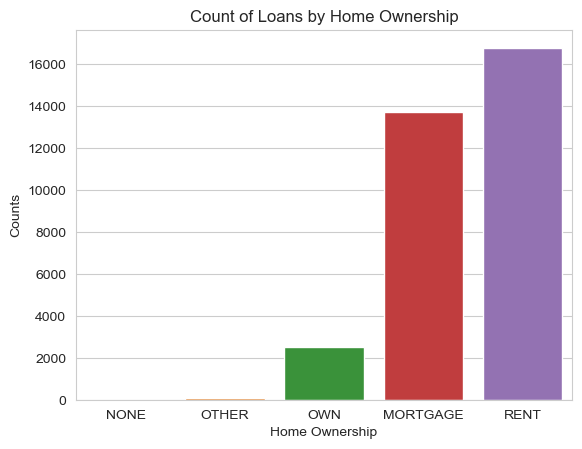

In [52]:
sns.countplot(data=loan_data, x='home_ownership', order=['NONE', 'OTHER', 'OWN', 'MORTGAGE', 'RENT'])
plt.title('Count of Loans by Home Ownership')
plt.xlabel("Home Ownership")
plt.ylabel("Counts")
plt.show()

Majority of borrowers RENT a home as per the above chart, followed by MORTGAGE and OWN.

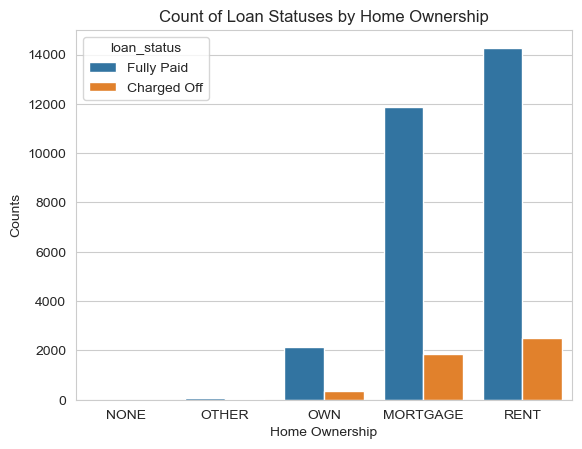

In [53]:
sns.countplot(data=loan_data, x='home_ownership', hue='loan_status', order=['NONE', 'OTHER', 'OWN', 'MORTGAGE', 'RENT'])
plt.title('Count of Loan Statuses by Home Ownership')
plt.xlabel("Home Ownership")
plt.ylabel("Counts")
plt.show()

From the above plot, we can see that those who OWNS home takes only few loans and those who defaults are also less. There are high number of borrowers who RENTs their home who defaults. We can plot a percentage graph to further investigate.

posx and posy should be finite values
posx and posy should be finite values


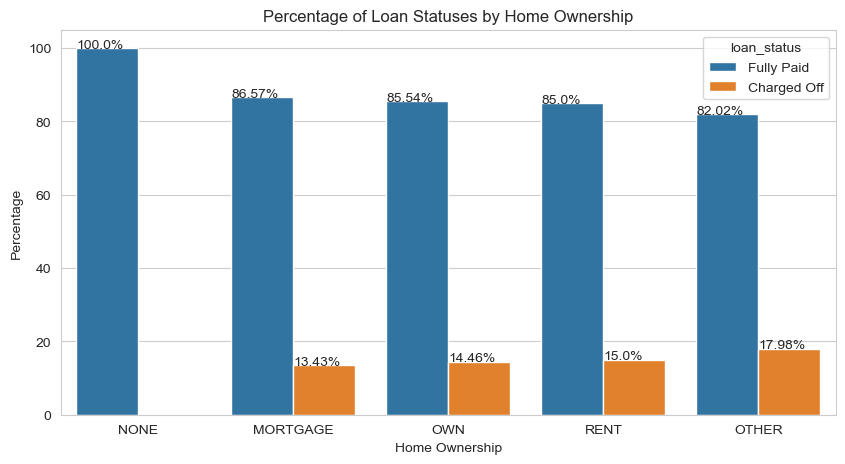

In [54]:
plot_percentage_bar(loan_data, 'home_ownership')
plt.title('Percentage of Loan Statuses by Home Ownership')
plt.xlabel("Home Ownership")
plt.show()

Based on the above percentages, those who are having house ownership of OTHER have the highest chance of defaulting.

In [55]:
generate_pivot(loan_data, 'home_ownership', 'annual_inc')

loan_status,Charged Off,Fully Paid
home_ownership,,
RENT,2519.0,14276.0
MORTGAGE,1843.0,11877.0
OWN,361.0,2136.0
OTHER,16.0,73.0
NONE,NaN,3.0


From the above analysis we can observe that, when the home_ownership is OTHER, the percentage of people defaulting is highest. The number of borrowers having the OTHER as high is very less compared to other categories. But risk for this category is high.

Apart from the OTHER, those who have RENT home ownership have the next highest chance of defaulting. Here the number of people who are RENTED and goes for loan is high.

### purpose

This column mentions the purpose for which the loan is taken. We can start by taking a count of defaulted and fully paid loans by segmenting on this category.

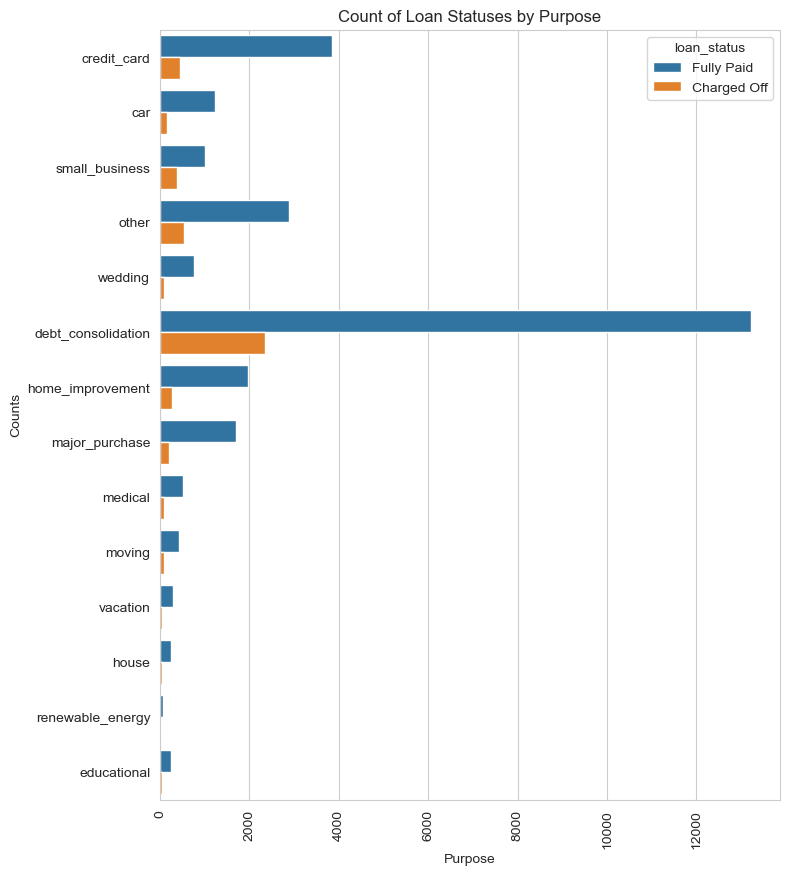

In [56]:
### purpose
plt.figure(figsize=(8, 10))
sns.countplot(data=loan_data, y='purpose', hue='loan_status', orient='h')
plt.xticks(rotation=90)
plt.title('Count of Loan Statuses by Purpose')
plt.xlabel("Purpose")
plt.ylabel("Counts")
plt.show()

In [57]:
generate_pivot(loan_data, 'purpose', 'annual_inc')

loan_status,Charged Off,Fully Paid
purpose,,
debt_consolidation,2344,13208
other,537,2876
credit_card,450,3855
small_business,372,1002
home_improvement,273,1974
major_purchase,196,1708
car,149,1220
medical,94,504
wedding,82,753


From the above, those borrowers who take loans for Debt Consolidation have high number of defaulters. But we can also see that the number of people taking loan for debt consolidation is also high.

We can also check the percentage of defaulters for each purpose.

<Figure size 1000x1000 with 0 Axes>

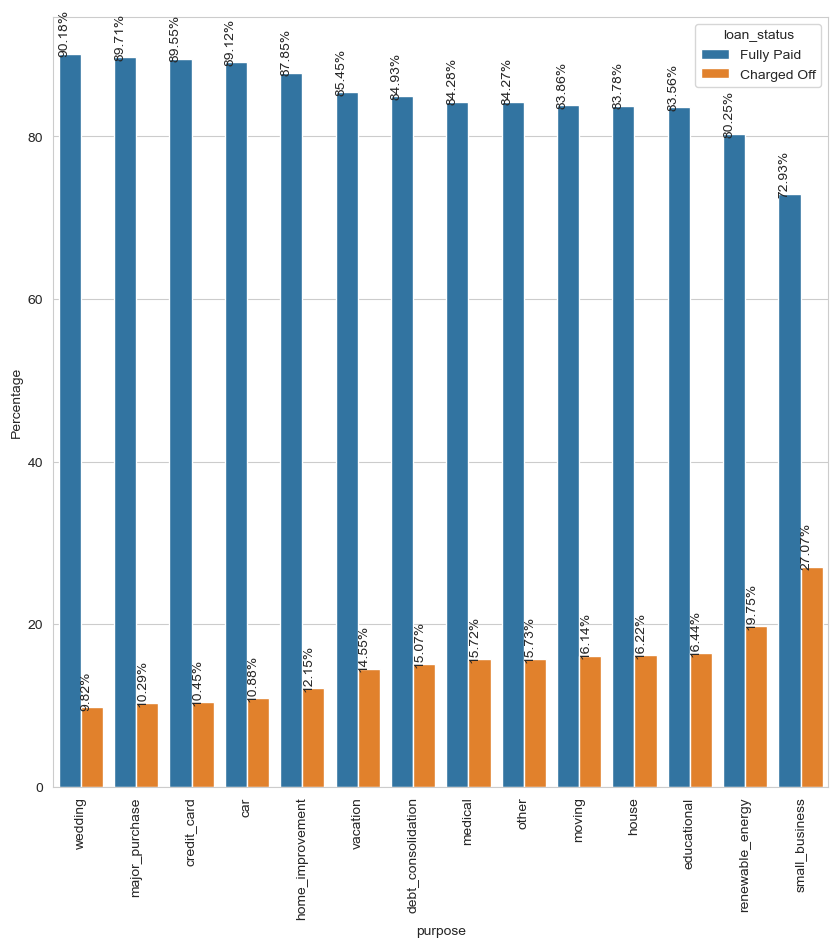

In [58]:
plt.figure(figsize=(10,10))
plot_percentage_bar(loan_data, 'purpose', vertical=True, figsize=(10, 10))
plt.xticks(rotation=90)
plt.show()

Borrowers who take loans for Small Business have a higher chance of defaulting compared to other purposes when we consider the percentage of defaulters.

From the above two graphs we can observe:
* The number of loans taken for debt_consolidation is the highest. But amount these borrowers 14.97% have defaulted.
* 27% of loans taken for small_businesses have been defaulted. This is quite high number.

### addr_state
This is the state in USA where the loan has been taken in. We can start by categorising and checking the counts for each state.

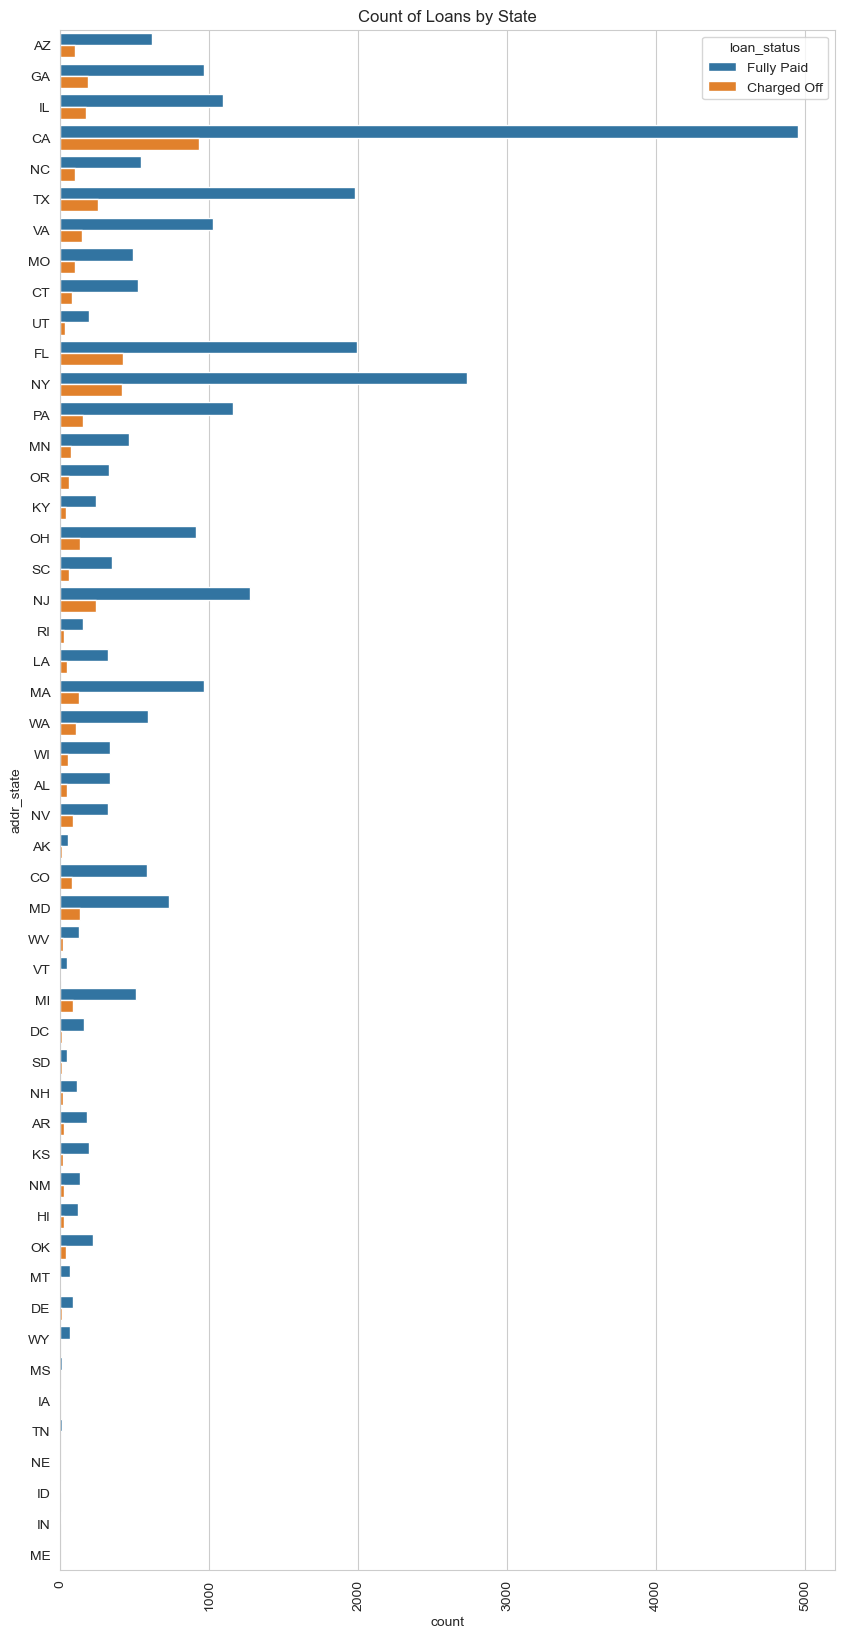

In [59]:
plt.figure(figsize=(10,20))
sns.countplot(data=loan_data, y='addr_state', hue='loan_status', orient='h')
plt.xticks(rotation=90)
plt.title('Count of Loans by State')
plt.show()

In [60]:
addr_state_pivot = generate_pivot(loan_data, 'addr_state', 'loan_amnt')
addr_state_pivot['Total'] = addr_state_pivot['Charged Off'] + addr_state_pivot['Fully Paid']
addr_state_pivot = addr_state_pivot.fillna(0)

total_loans = addr_state_pivot['Total'].sum()
print('Total Loans Taken Is : ', total_loans)
addr_state_pivot['PercentageOfLoansTakenInState'] = round(addr_state_pivot['Total'] * 100 / total_loans, 2)
addr_state_pivot.sort_values('PercentageOfLoansTakenInState', ascending=False)

Total Loans Taken Is :  33088.0


loan_status,Charged Off,Fully Paid,Total,PercentageOfLoansTakenInState
addr_state,,,,
CA,933.0,4951.0,5884.0,17.78
NY,415.0,2728.0,3143.0,9.50
FL,420.0,1992.0,2412.0,7.29
TX,254.0,1979.0,2233.0,6.75
NJ,243.0,1277.0,1520.0,4.59
PA,152.0,1159.0,1311.0,3.96
IL,174.0,1093.0,1267.0,3.83
VA,146.0,1028.0,1174.0,3.55
GA,185.0,969.0,1154.0,3.49


From the above, those borrowers who are from CA (California) have high number of loans Charged Off.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


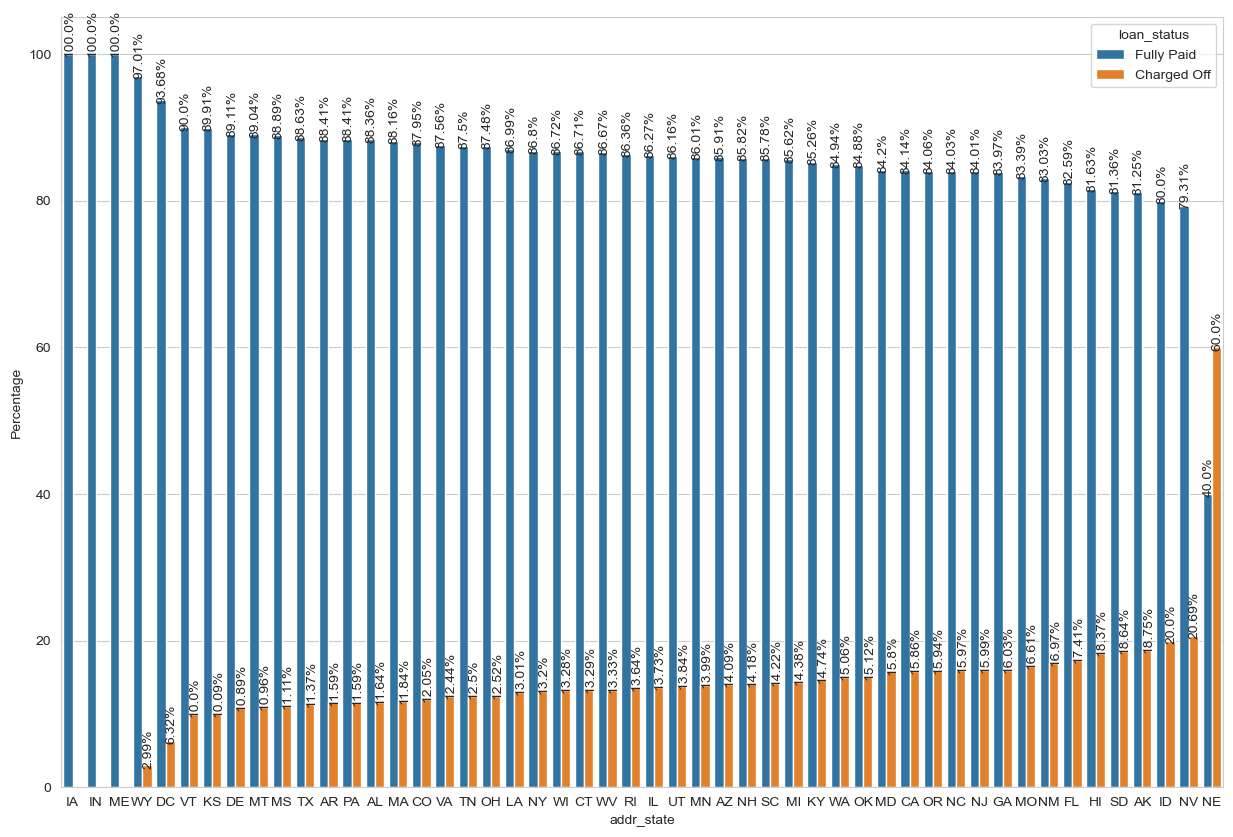

In [61]:
plot_percentage_bar(loan_data, 'addr_state', vertical=True, figsize=(15, 10))
plt.show()

From the above percentage graph NE(Nebraska) has the highest percentage of defaulters. But this value cannot be relied upon, because only 0.01% of the total loans (5 loans) is taken and 3 of them is charged off.

We can check for something higher - NV(Nevada). 1.23% of the total loans(420) were taken in Nevada. 21% of these were defaulted.

So if a loan is taken in Nevada, it has a high chance of getting defaulted.

## Ordered Categorical Variable

### term_in_months

This column mentions the loan term. It can be 36 or 60 months. We can start by checking count of loans in each categories.

<Axes: xlabel='term_in_months', ylabel='count'>

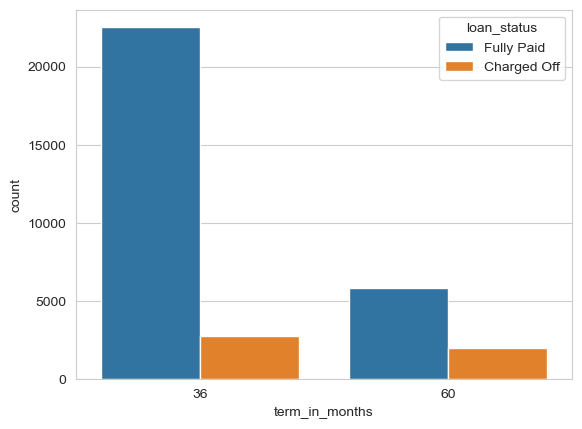

In [62]:
sns.countplot(data=loan_data, x='term_in_months', hue='loan_status')

Most number of loans are taken for a term of 36 months. These have the highest number of Charged Off loans also. Lets also check the percentage of loans which are Charged Off 

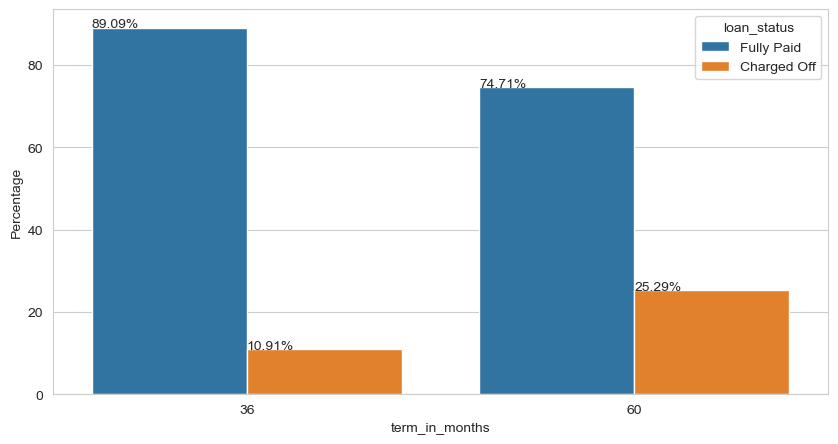

In [63]:
plot_percentage_bar(loan_data, 'term_in_months', figsize=(10,5))

From the above graphs we can observe that the risk of defaulting increases if the tenure increases. Around 25.25% of the loans were Charged Off for 60 months term. This is more than double the rate for 36 month loans.

### grade

This is the grade assigned to the loan by LC. We can start by checking the counts.

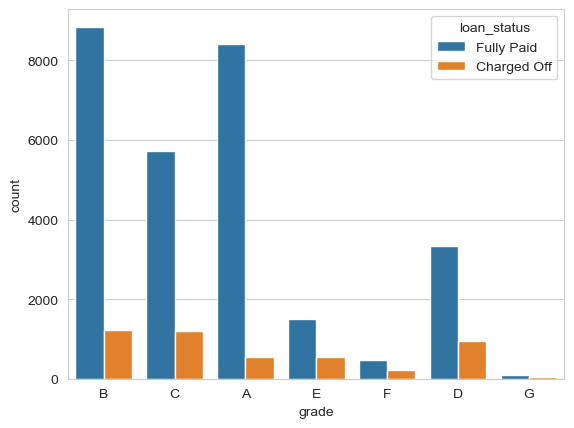

In [64]:
sns.countplot(data=loan_data, x='grade', hue='loan_status')
plt.show()

In [65]:
generate_pivot(loan_data, 'grade', 'loan_amnt')

loan_status,Charged Off,Fully Paid
grade,,
B,1237,8849
C,1189,5719
D,956,3326
E,551,1494
A,536,8414
F,217,466
G,53,97


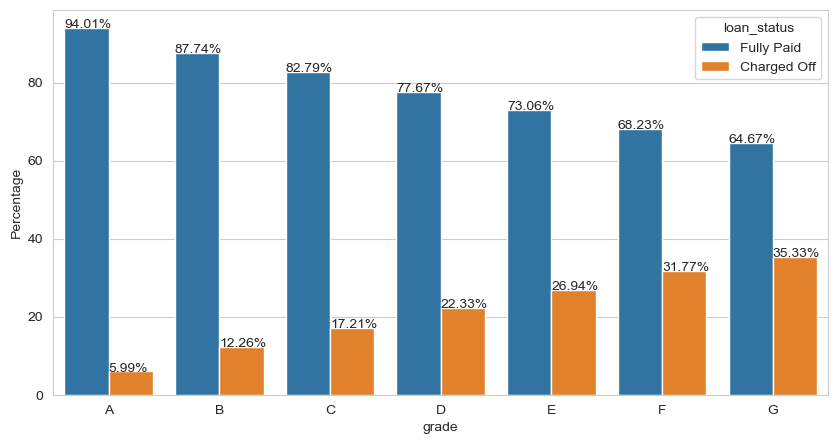

In [66]:
plot_percentage_bar(loan_data, 'grade')

From the above plot, we can see that the chance of defaulting increases as grade goaes from A to G. Most of the loans are in grade B. But the percentage graph clearly shows that the percentage of Charged Off loans increase as the grade goes from A to G.

### emp_length

This column indicates the employee experience.

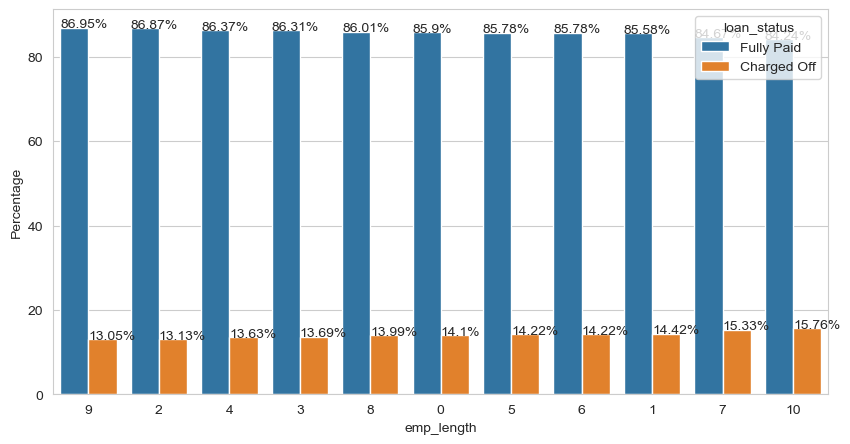

In [67]:
plot_percentage_bar(loan_data, 'emp_length', figsize=(10,5))

From above graph, we can see that employment length doesn't influence the defaulting much as all are around 13-15% range and 

Text(0.5, 1.0, 'Count of Loans by emp_length')

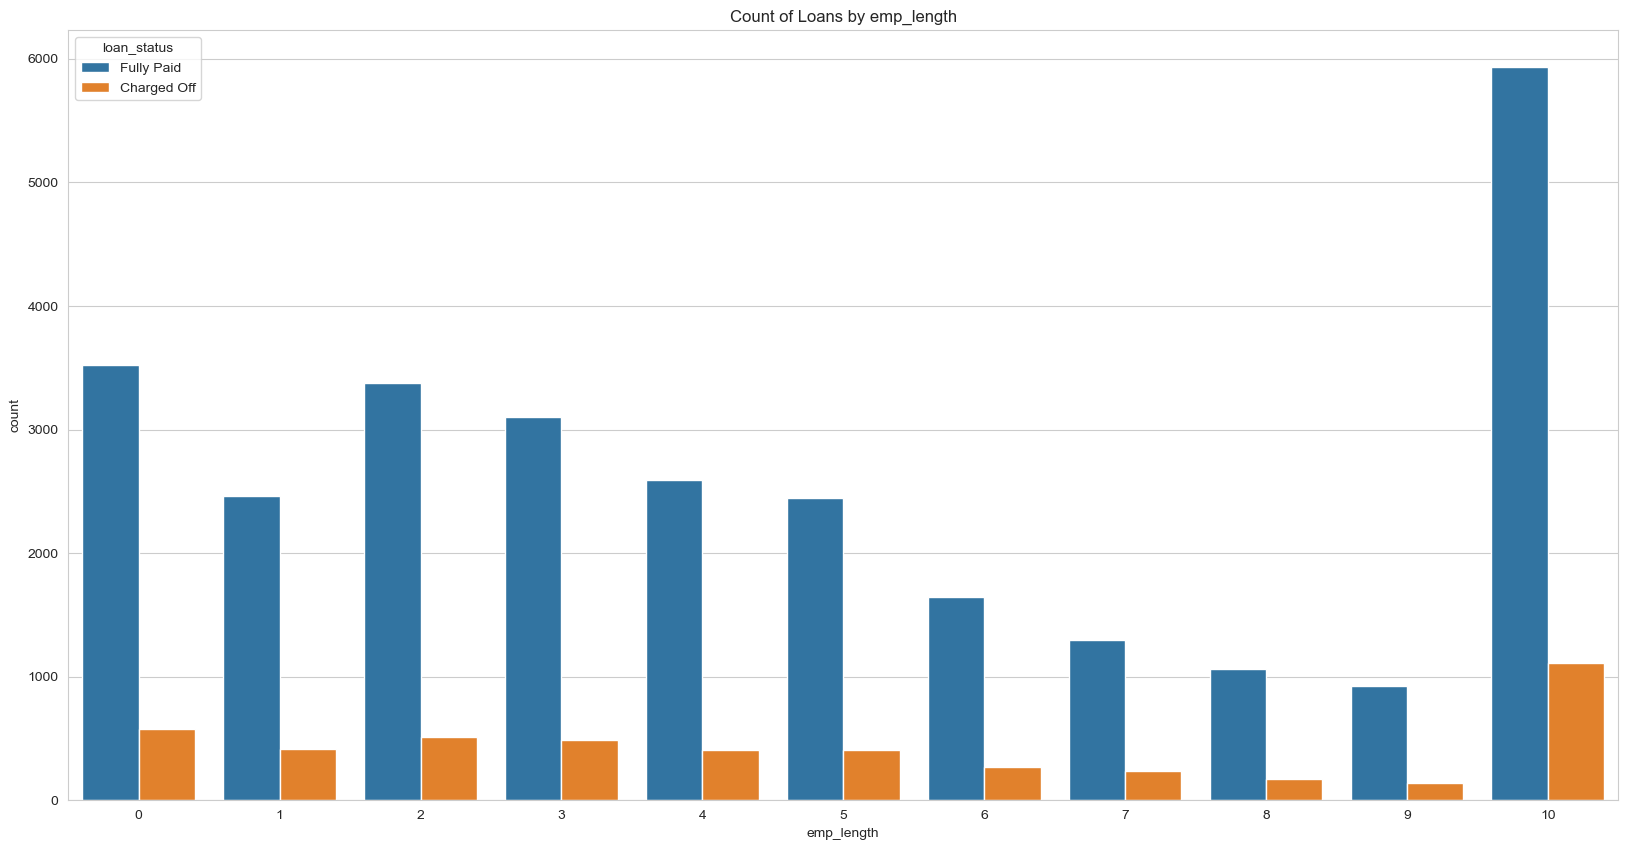

In [68]:
plt.figure(figsize=(20, 10))
sns.countplot(data=loan_data, x='emp_length', hue='loan_status')
plt.title('Count of Loans by emp_length')

From the above graph we can see that the number of loans taken by borrowers with 10+ years of experience is higher than others. But one reason could be the other ages are represented in buckets of 1 year span, and 10+ can include people with experience in more than 50+ years also.

Hence overall, emp_length is not really helpful in deciding whether the person is going to default or not.

### issue_year

This is the year in which the loan is taken.

Text(0.5, 1.0, 'Count of Loans by issue_year')

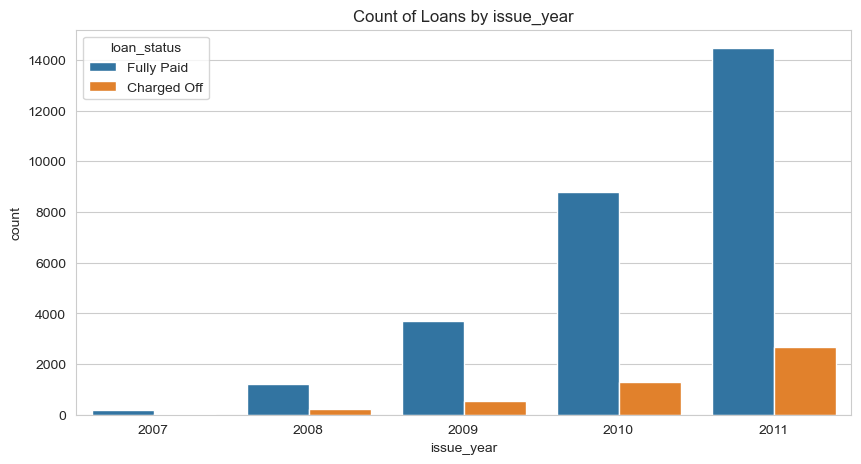

In [69]:
plt.figure(figsize=(10, 5))
sns.countplot(data=loan_data, x='issue_year', hue='loan_status')
plt.title('Count of Loans by issue_year')

From above graph, we can see that the number of people borrowing the loan is increasing every year and the most number of loans is taken on 2011.

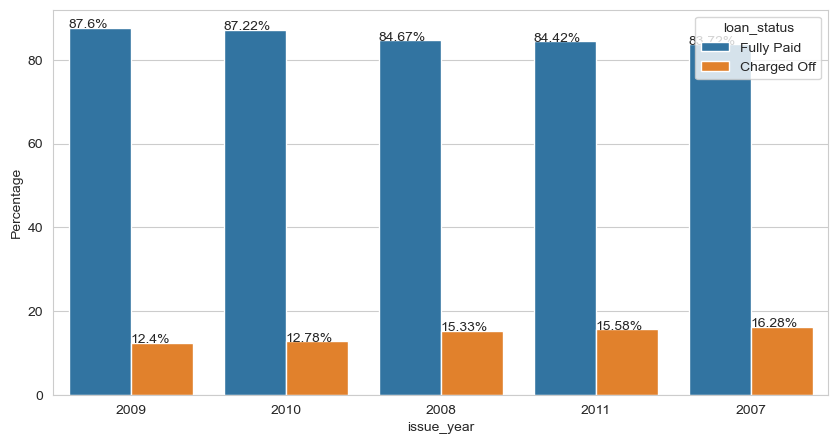

In [70]:
plot_percentage_bar(loan_data, 'issue_year', figsize=(10,5))

From the above graph we can see that the percentage of defaulters doesn't produce any useful patterns. This is highest in year 2007 though.

### issue_month

This is the month in which the loan is taken.

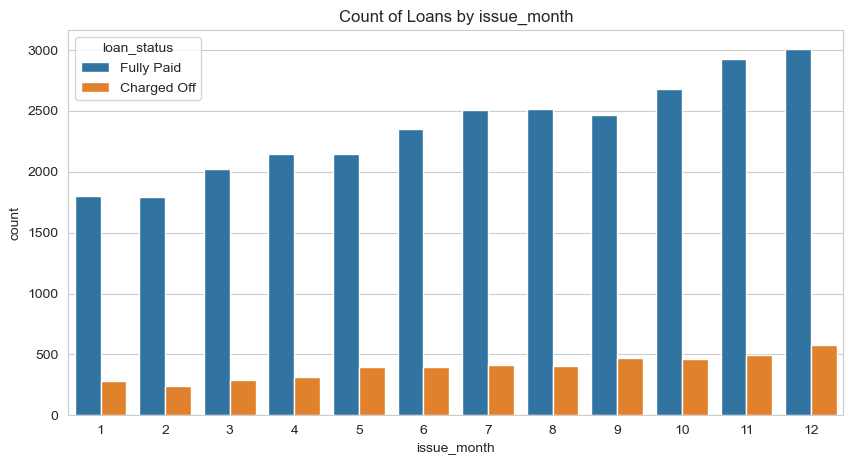

In [71]:
plt.figure(figsize=(10, 5))
sns.countplot(data=loan_data, x='issue_month', hue='loan_status')
plt.title('Count of Loans by issue_month')
plt.show()

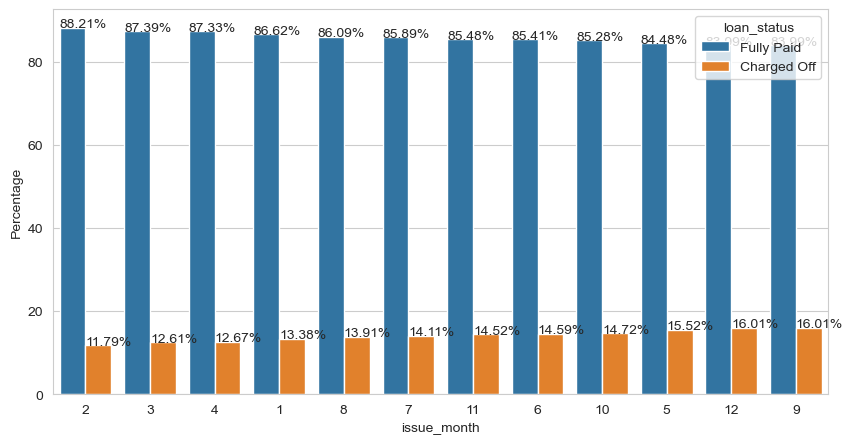

In [72]:
plot_percentage_bar(loan_data, 'issue_month')

From the above charts, more loans are taken in december and also the percentage of Charged Off loans is highest in december.

## Quantitative Variables

## loan_amnt

This is the listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

<Axes: xlabel='loan_amnt', ylabel='Count'>

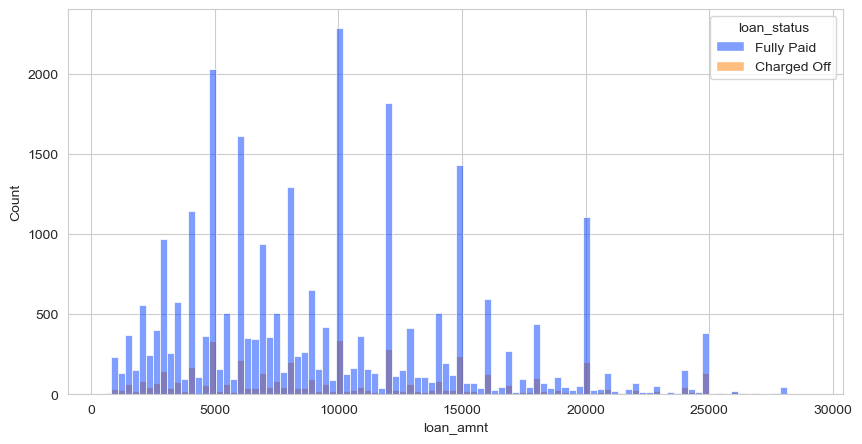

In [73]:
plt.figure(figsize=(10, 5))
sns.histplot(data=loan_data, x='loan_amnt', hue='loan_status', palette='bright', bins=100)

We can see that most number of loans of the loans is for amount 10000. Also we can see an interesting pattern that there are spikes at multiples of 5000.

We can derive a new category based on range of loan amounts and use this for analysis.

In [74]:
def generate_buckets(dataframe, column, bucket_width):
    max_value = dataframe[column].astype(int).max()
    bins = [x for x in range(0, max_value + bucket_width, bucket_width)]
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(0, len(bins)-1)]
    return pd.cut(loan_data[column], bins=bins, labels=labels)

In [75]:
loan_data['loan_amnt_bkt'] = generate_buckets(loan_data, 'loan_amnt', 6000)

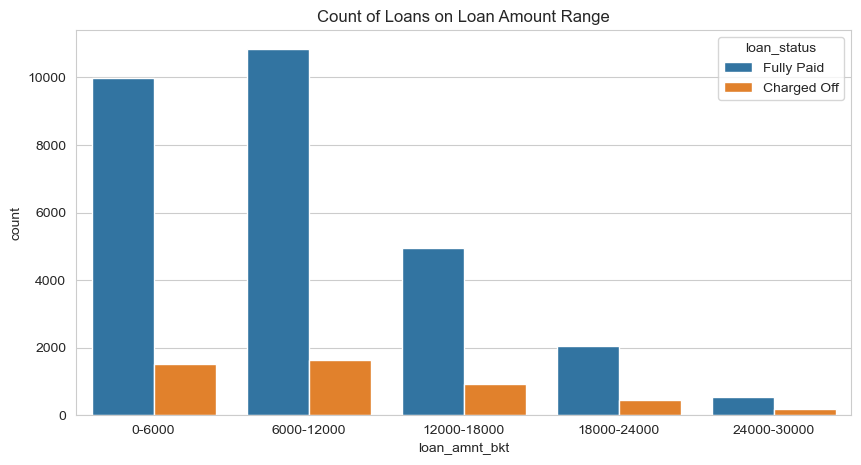

In [76]:
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data, x='loan_amnt_bkt', hue='loan_status')
plt.title('Count of Loans on Loan Amount Range')
plt.show()

We can see that most of the loans are taken in the range of 6000-12000. This range also have the highest number of defaults. We can check the percentage of Charged Off Loans also.

Text(0.5, 1.0, 'Percentage of Loans on Loan Amount Range')

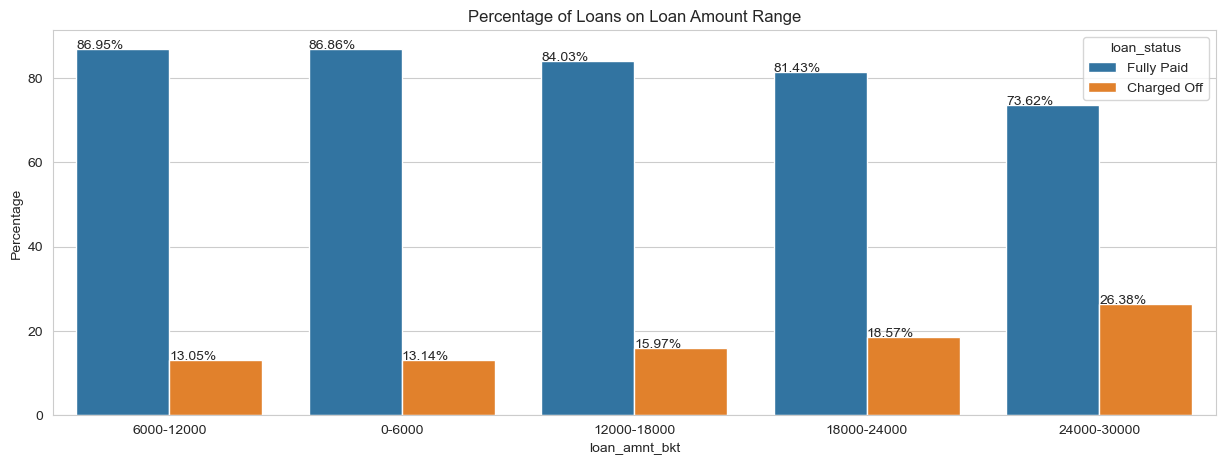

In [77]:
plot_percentage_bar(loan_data, 'loan_amnt_bkt', figsize=(15,5))
plt.title('Percentage of Loans on Loan Amount Range')

From the above graphs, we can see that even though the number of loans taken reduces as the loan_amnt is increasing, the Charged Off loans increase as the loan amount increases.

### int_rate

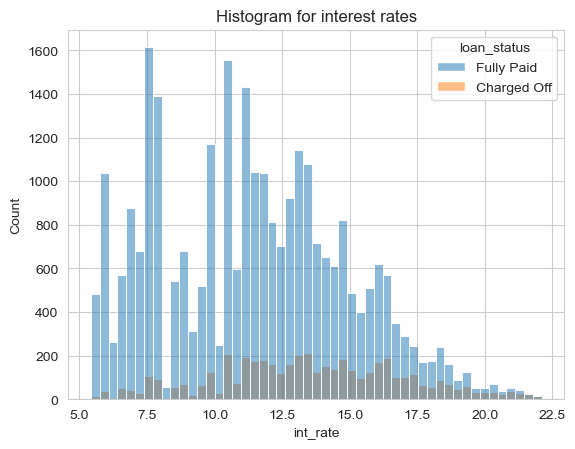

In [78]:
sns.histplot(data=loan_data, x='int_rate', hue='loan_status')
plt.title('Histogram for interest rates')
plt.show()

We can bucket the interest rates to analyse further

In [79]:
# Interest rate bucketing
bins = [x/10 for x in range(50, 250, 25)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(0, len(bins) - 1)]
loan_data['int_rate_bkt'] = pd.cut(loan_data['int_rate'], bins=bins, labels=labels)
loan_data['int_rate_bkt'].value_counts()

10.0-12.5    8124
12.5-15.0    7771
7.5-10.0     6177
5.0-7.5      4759
15.0-17.5    4291
17.5-20.0    1544
20.0-22.5     438
Name: int_rate_bkt, dtype: int64

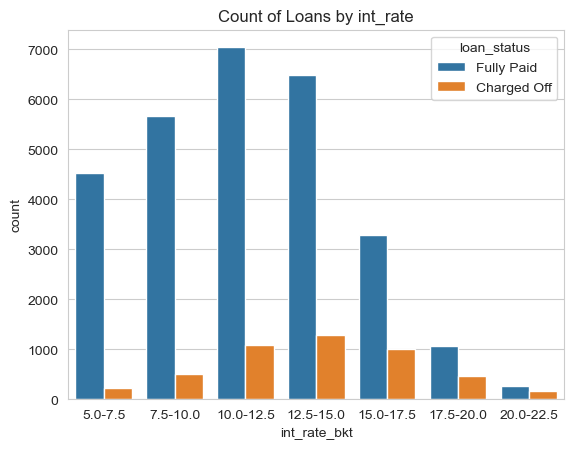

In [80]:
sns.countplot(data=loan_data, x='int_rate_bkt', hue='loan_status')
plt.title('Count of Loans by int_rate')
plt.show()

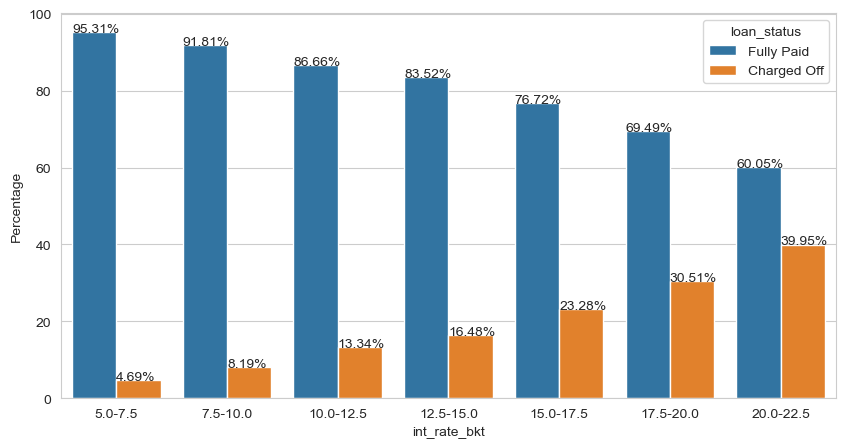

In [81]:
plot_percentage_bar(loan_data, 'int_rate_bkt', figsize=(10,5))

Most of the loans are at interest rate 10-12.5. We can also see that as the interest rate increases, the percentage of Charged Off loans increases.

### annual_inc

This is the annual income of the borrower.

We can try to do an analysis on the Annual Income starting with a histogram.

<Axes: xlabel='annual_inc', ylabel='Count'>

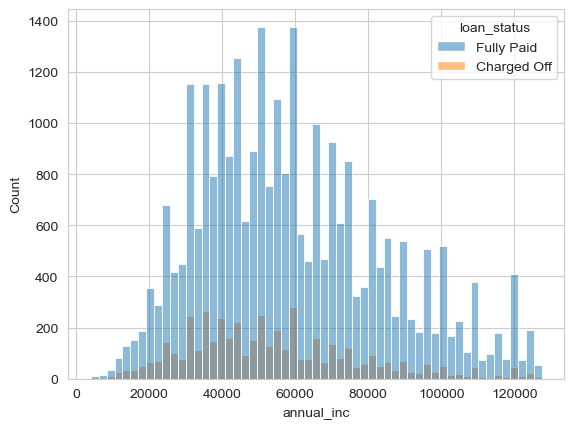

In [82]:
sns.histplot(data=loan_data, x='annual_inc', hue='loan_status')

We can see that majority of loans are taken by borrowers having annual income of 40000-60000. This is not showing any patterns. So we can check more details of the data.

count     33104.000000
mean      58421.180537
std       25246.117585
min        4000.000000
25%       39996.000000
50%       54996.000000
75%       75000.000000
max      127500.000000
Name: annual_inc, dtype: float64


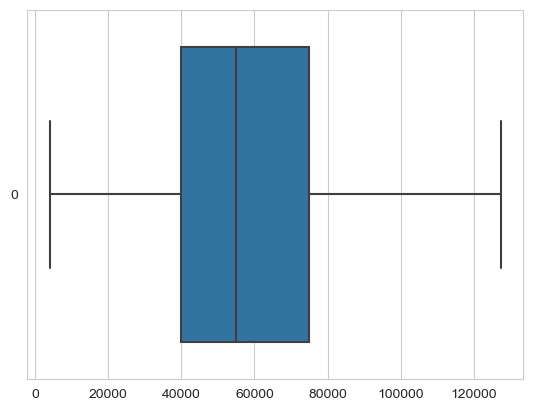

In [83]:
print(loan_data['annual_inc'].describe())
sns.boxplot(loan_data['annual_inc'], orient='h')
plt.show()

From above, we can see that the median is 55000. This can with the annual incomes ranging from 4000 to 127500 after dropping the outliers.

We can group the annual income into buckets and see how the pattern of defaulting varies per bucket.

In [84]:
loan_data['annual_inc_bkt'] = generate_buckets(loan_data, 'annual_inc', 30000)
loan_data['annual_inc_bkt'].value_counts() 

30000-60000      15697
60000-90000       9166
0-30000           4183
90000-120000      3683
120000-150000      375
Name: annual_inc_bkt, dtype: int64

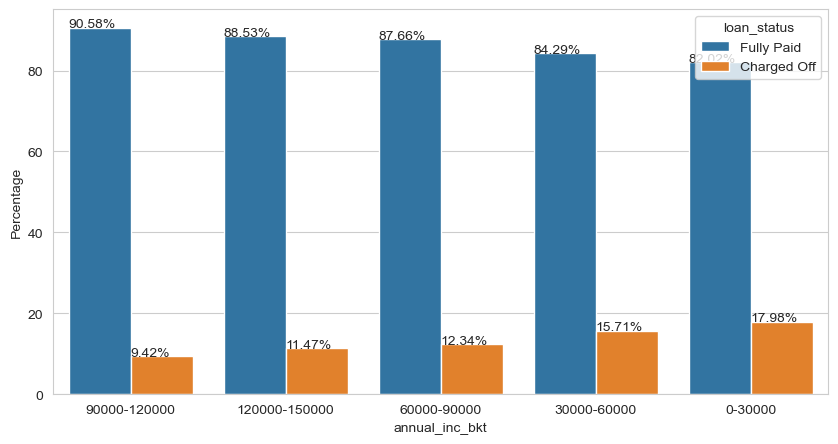

In [85]:
plot_percentage_bar(loan_data, 'annual_inc_bkt')

From the above chart, we can see that the chances of defaulting is high if the income is less. The lowest income group - 0K-30K have the highest chance of loan being defaulted. The chance is around 18%

### pub_rec

This variable represent the number of derogatory public records. We can analyse how the variable affect the loan_status

In [86]:
loan_data['pub_rec'].value_counts(dropna=False)

0    31292
1     1760
2       44
3        6
4        2
Name: pub_rec, dtype: int64

<Axes: xlabel='pub_rec', ylabel='count'>

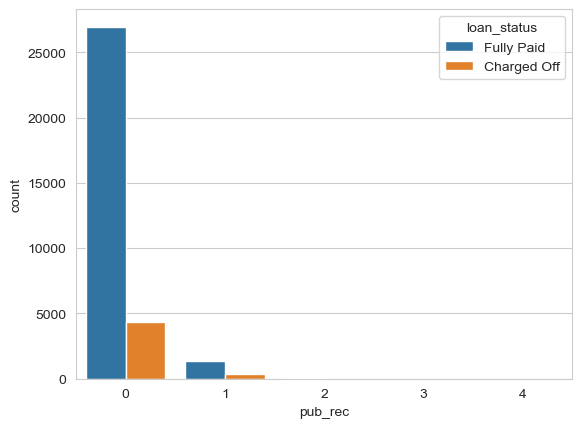

In [87]:
sns.countplot(data=loan_data, x='pub_rec', hue='loan_status')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


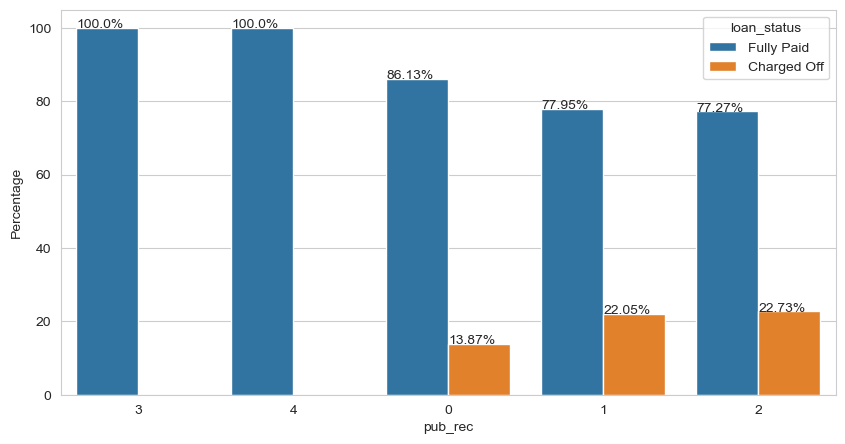

In [88]:
plot_percentage_bar(loan_data, 'pub_rec')

From the above chart, we can see that the defaulters increases as the number of pub_rec increases. But from 3 pub_rec, we don't see anymore defaulters. This is because we have only 8 borrowers and they have paid it fully.

### installment
This is the monthly payment which needs to be done by the borrower if the loan is sanctioned. 

<Axes: >

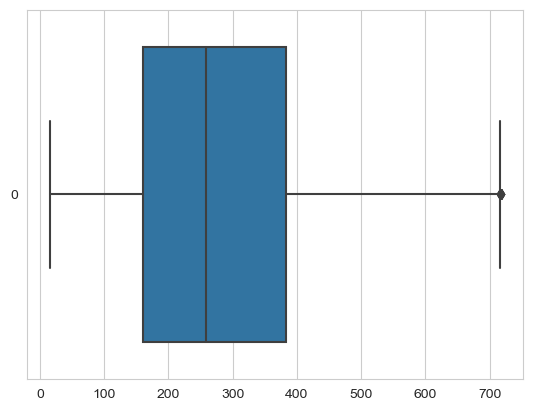

In [89]:
sns.boxplot(loan_data['installment'], orient='h')

<Axes: xlabel='installment', ylabel='Count'>

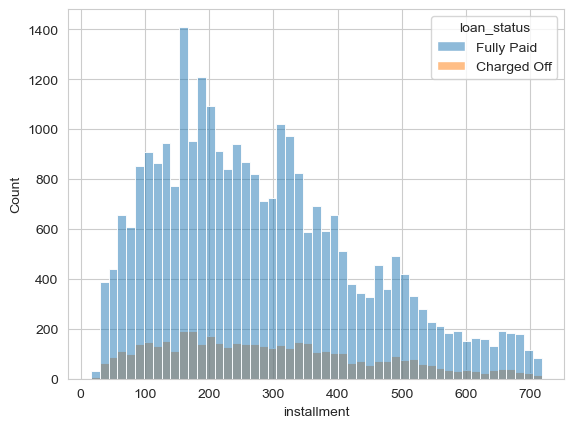

In [90]:
sns.histplot(loan_data, x='installment',hue='loan_status')

In [91]:
loan_data['installment_bkt'] = generate_buckets(loan_data, 'installment', 100)
loan_data['installment_bkt'].value_counts()

100-200    8512
200-300    7104
300-400    6517
0-100      3674
400-500    3544
500-600    2222
600-700    1408
700-800     123
Name: installment_bkt, dtype: int64

<Axes: xlabel='installment_bkt', ylabel='count'>

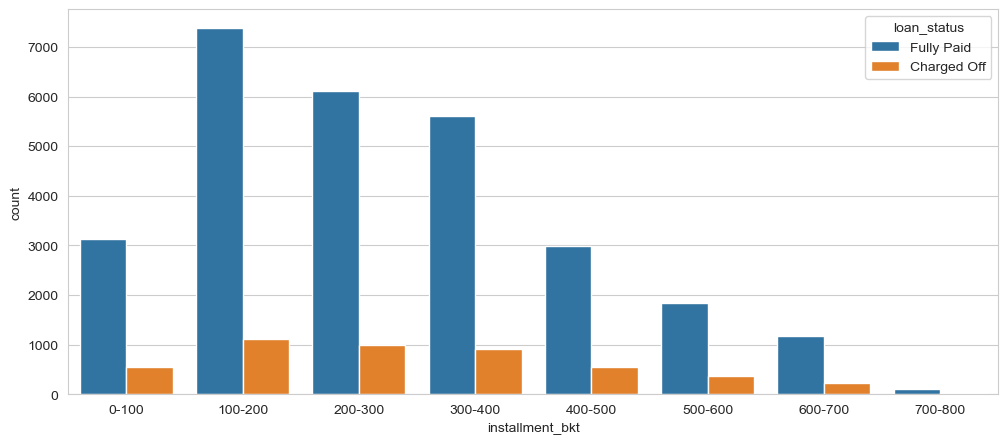

In [92]:
plt.figure(figsize=(12, 5))
sns.countplot(loan_data, x='installment_bkt', hue='loan_status')


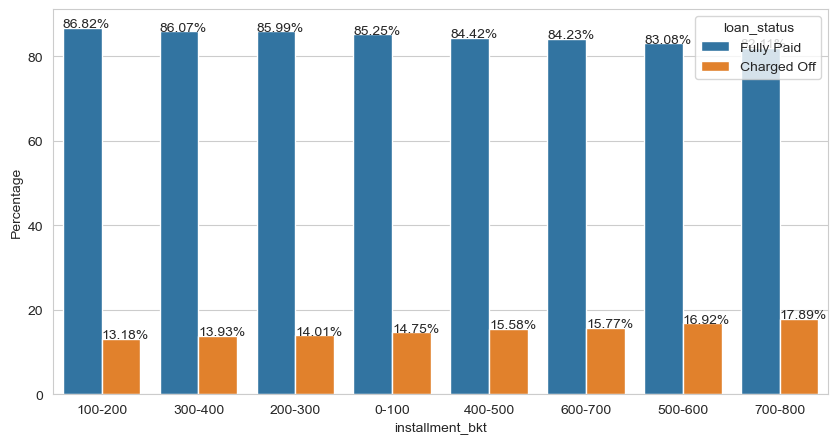

In [93]:
plot_percentage_bar(loan_data, 'installment_bkt')

For installment, we can have the below observations:
1. Most of the installments are in the range 100-200.
2. Highest chance of loan being charged off is in the range 700-800. 

### dti

This ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

We will start by plotting a boxplot.

<Axes: >

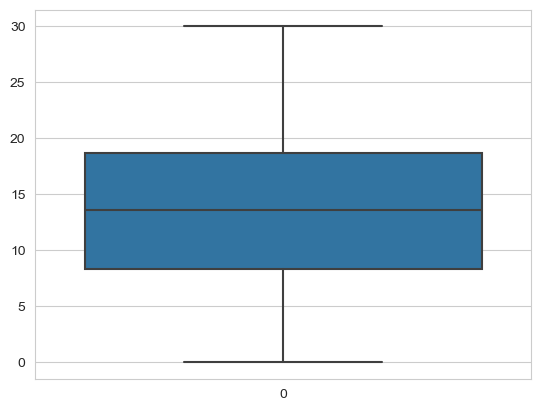

In [94]:
sns.boxplot(loan_data['dti'])

There are no outliers in this column. We will look at the histogram.

<Axes: xlabel='dti', ylabel='Count'>

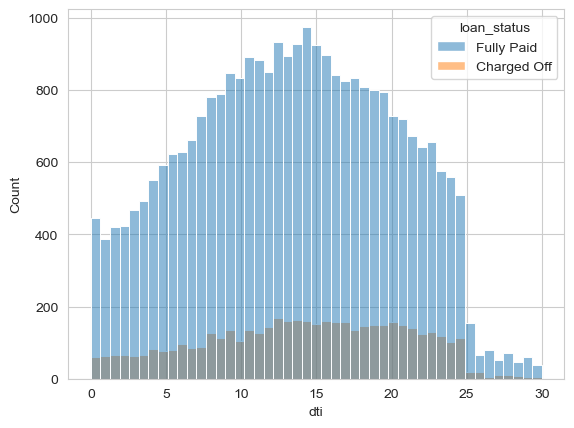

In [95]:
sns.histplot(data=loan_data, x='dti', hue='loan_status')

We will bucket the dti and analyse on the buckets.

In [96]:
loan_data['dti_bkt'] = generate_buckets(loan_data, 'dti', 5)
loan_data['dti_bkt']

0        25-30
1          0-5
2         5-10
3        15-20
5        10-15
         ...  
39711    15-20
39712    10-15
39713     5-10
39714      0-5
39716    10-15
Name: dti_bkt, Length: 33104, dtype: category
Categories (6, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25' < '25-30']

<Axes: xlabel='dti_bkt', ylabel='count'>

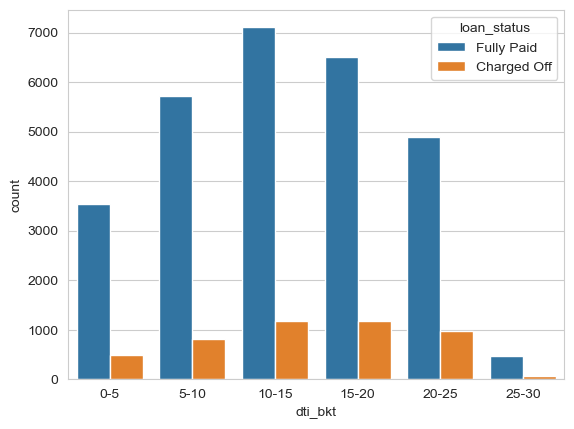

In [97]:
sns.countplot(data=loan_data, x='dti_bkt', hue='loan_status')

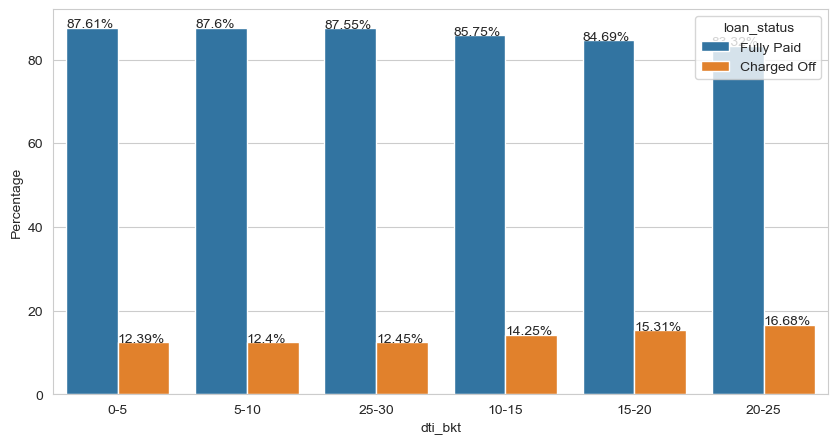

In [98]:
plot_percentage_bar(loan_data, 'dti_bkt')

We can observe that the dti of 20-25 range has highest chance of loan Charged Off.

# Univariate Analysis Observations
* Majority of borrowers RENT a home as per the above chart, followed by MORTGAGE and OWN.
* 18% of loans borrowed by the OTHER home_owneres are Charged Off followed by 15% for those who RENT.
* Majority of the loans are taken for the purpose of debt_consolidation.
* 27% of loans taken for the purpose of small_business is Charged off.
* California takes most number of loans
* 20% of loans taken in Nevada is defaulted.
* 25.3% of loans taken for 60 months term is defaulted.
* As grade goes from A to G, the risk of defaulting increases from 5.99% - 35.33%
* Number of loans granted has increased from 2007 to 2011
* Loans taken in 2007 have 16.26% for defaulting.
* December had the most number of loans taken and also the highest rate of loan being Charged off.
* Most number of loans are granted with loan_amnt of 10000.
* As the loan amount increases, the chances of defaulting increases. 24-30K have a chance of 26.36% of being Charged Off.
* As interest rate increases, the chances of defaulting increases. 20-22.5% interest rate have approximately 40% chance of defaulting.
* As annual income decreases the chance of defaulting increases. 0-30K income group have 18% loans Charged Off.
* As number of derogatory public records increases, the risk of defaulting increases. But sufficient data is not available for more than 2. For 2 pub_rec, 22.7% of loans are Charged Off.
* As the installment amount increases, the chances of Charging off increases. Installment amount in the range 700-800 have 17.89% for Charging Off.


# Bivariate Analysis

We will do the bivariate analysis in this section.

Correlation matrix for the columns are as follows:

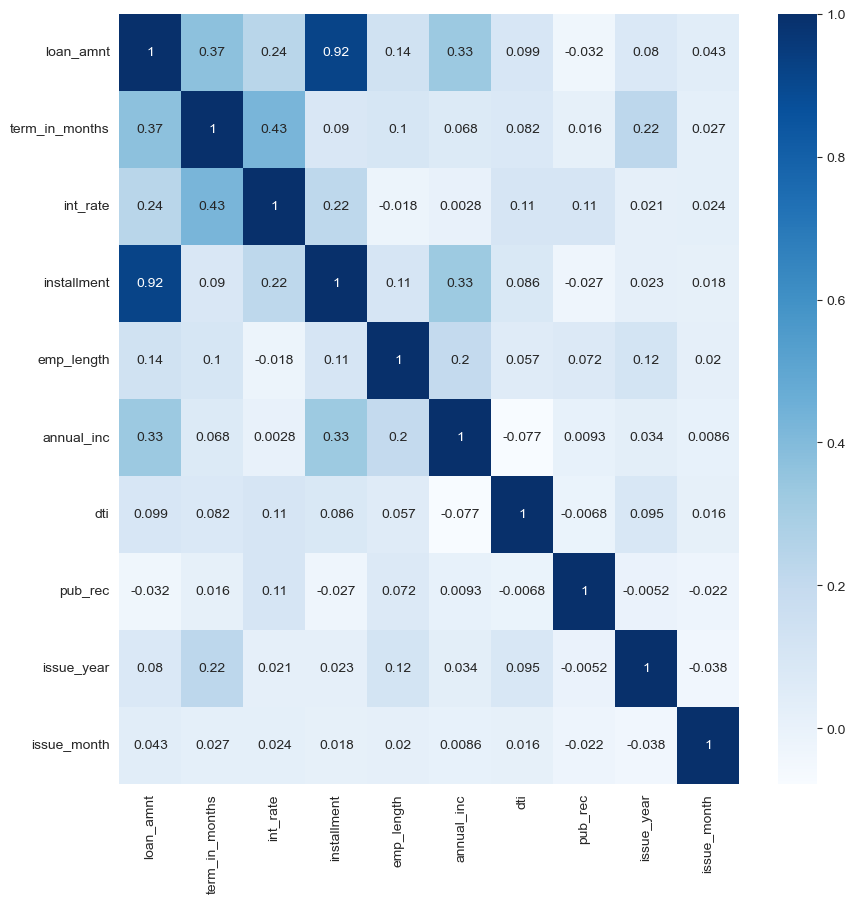

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(), annot=True, cmap='Blues')
plt.show()

From the above we can see that the loan amount highly correlates with installment. This is expected.

## Loan Amount vs Term In Months

We can check how the loan_amnt and term_in_months drive the loan_status.

<Axes: xlabel='term_in_months', ylabel='loan_amnt'>

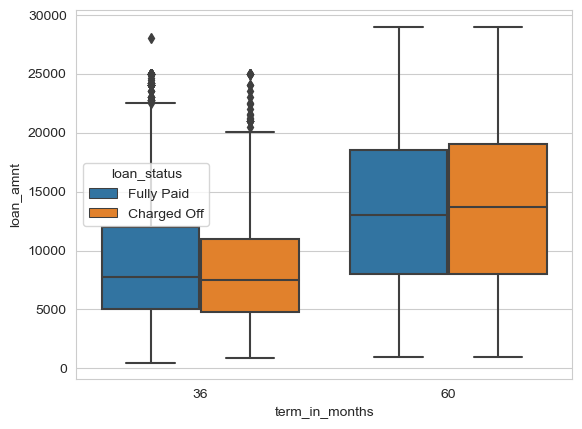

In [100]:
sns.boxplot(data=loan_data, x='term_in_months', y='loan_amnt', hue='loan_status')

<Axes: xlabel='term_in_months', ylabel='loan_amnt'>

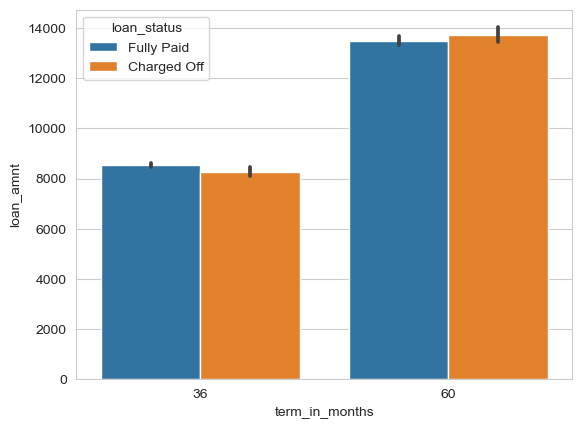

In [101]:
sns.barplot(data=loan_data, x='term_in_months', y='loan_amnt', hue='loan_status')

From the above boxplot, we can see that, when people opt for higher loan amounts, they opt for longer duration. With higher loan amounts, chances of loan being Charged Off also increases.

## Loan Amount vs Interest Rate

We can check how the loan_amount and interest rate drive loan_status. We can group the interest rate into buckets and use that for comparison.

<Axes: xlabel='loan_amnt_bkt', ylabel='int_rate'>

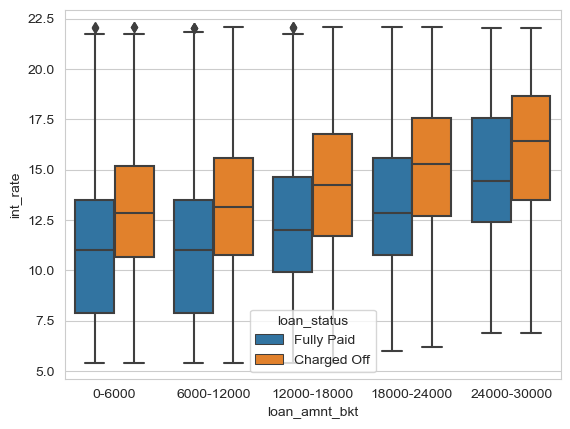

In [102]:
sns.boxplot(data=loan_data, x='loan_amnt_bkt', y='int_rate', hue='loan_status')

<Axes: xlabel='loan_amnt_bkt', ylabel='int_rate'>

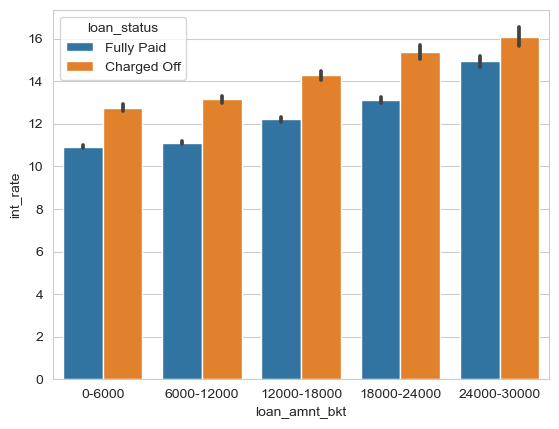

In [103]:
sns.barplot(data=loan_data, x='loan_amnt_bkt', y='int_rate', hue='loan_status')

From the box plots above, we can clearly see that as loan amount increases, interest rate also increases. Also, for the Charged Off loans, the interest rate is higher than that of the Fully Paid loans in the same segment.

## Loan Amount vs Installment

We can check how the loan amount varies with installment. We can bucket loan amount or installment and then compare them.

<Axes: xlabel='loan_amnt_bkt', ylabel='installment'>

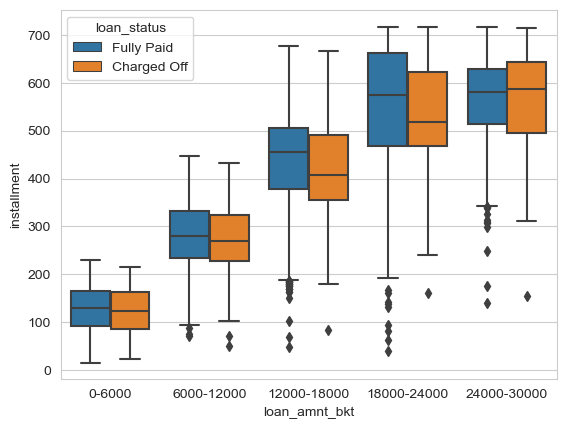

In [104]:
sns.boxplot(data=loan_data, x='loan_amnt_bkt', y='installment', hue='loan_status')

<Axes: xlabel='loan_amnt_bkt', ylabel='installment'>

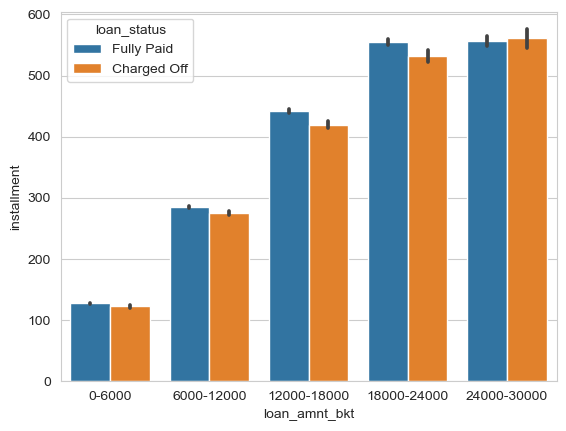

In [105]:
sns.barplot(data=loan_data, x='loan_amnt_bkt', y='installment', hue='loan_status')

We can see that as the loan amount increases, installment also increases. The median/mean of the installments for Charged Off loans is less than that of the median/mean for Fully Paid loans. This means that there is no strong relation between installment and defaulting.

## Loan Amount vs Employment Length

We will compare loan_amnt vs emp_length.

<Axes: xlabel='loan_amnt_bkt', ylabel='emp_length'>

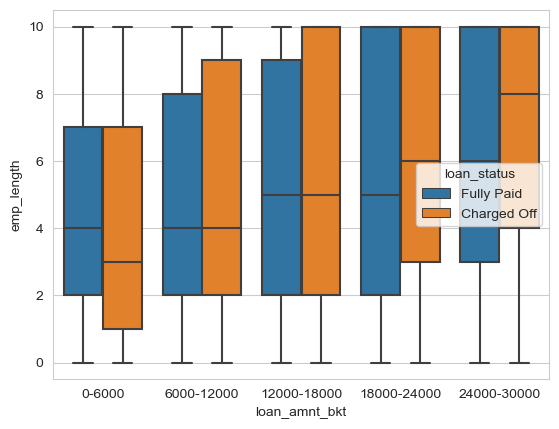

In [106]:
sns.boxplot(data=loan_data, x='loan_amnt_bkt', y='emp_length', hue='loan_status')

<Axes: xlabel='loan_amnt_bkt', ylabel='emp_length'>

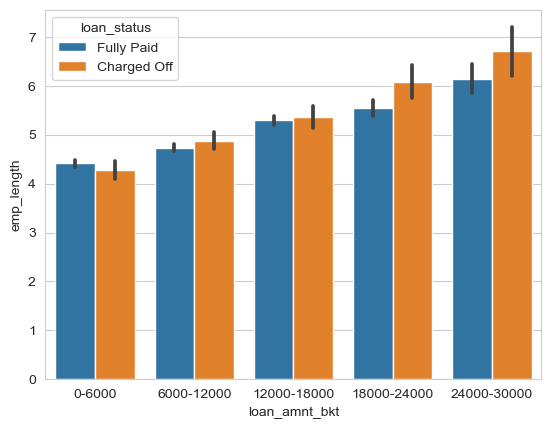

In [107]:
sns.barplot(data=loan_data, x='loan_amnt_bkt', y='emp_length', hue='loan_status')

From the above plots we can observe that:
* As loan amount increases, the chances of it being Charged Off increases
* In each loan_amount range, those who have more employment length have higher probability of defaulting as seen from mean and median of the above plots.

## Loan Amount vs Home Ownership

<Axes: xlabel='home_ownership', ylabel='loan_amnt'>

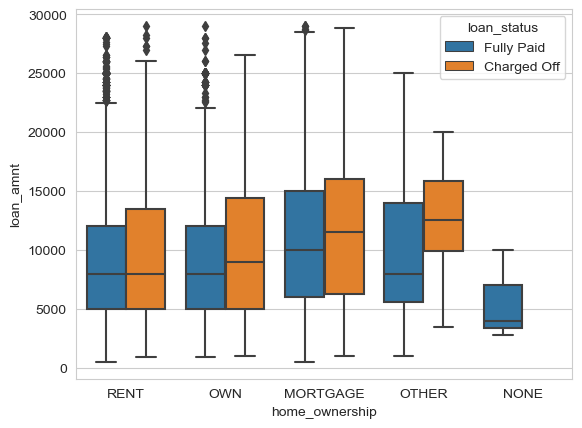

In [108]:
sns.boxplot(data=loan_data, x='home_ownership', y='loan_amnt', hue='loan_status')

<Axes: xlabel='home_ownership', ylabel='loan_amnt'>

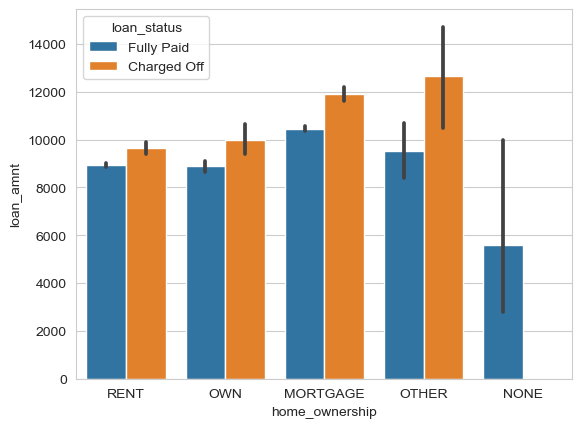

In [109]:
sns.barplot(data=loan_data, x='home_ownership', y='loan_amnt', hue='loan_status')

From the above plots, those who have OTHER as the home_ownership and are Charged Off, have a high mean and median values of loan_amnt.

## Loan Amount vs Annual Income

<Axes: xlabel='loan_amnt_bkt', ylabel='annual_inc'>

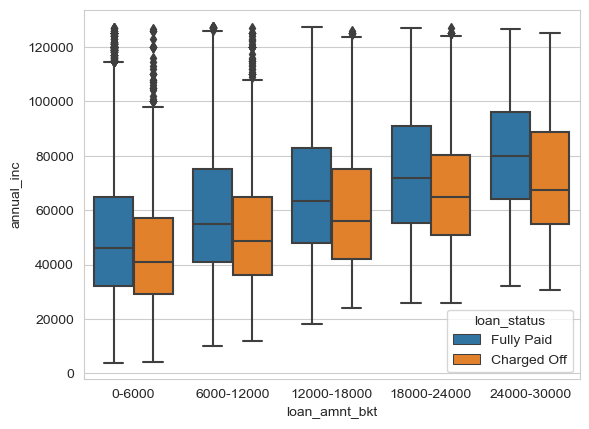

In [110]:
sns.boxplot(data=loan_data, x='loan_amnt_bkt', y='annual_inc', hue='loan_status')

<Axes: xlabel='loan_amnt_bkt', ylabel='annual_inc'>

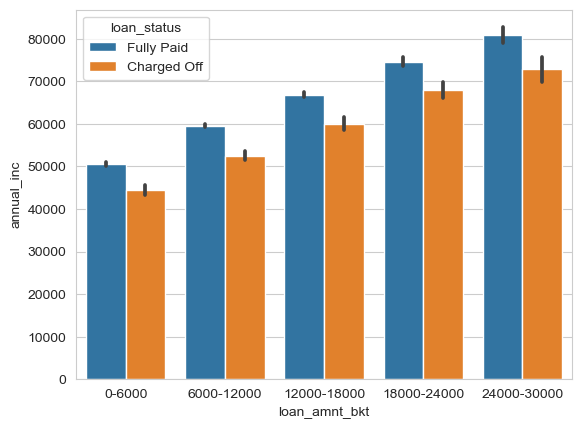

In [111]:
sns.barplot(data=loan_data, x='loan_amnt_bkt', y='annual_inc', hue='loan_status')

From the above plots, we can see that the mean and median of annual_inc rises with the loan_amnt. This means that people who opt for higher loan_amnt generally have higher annual income.
Also among each loan_amnt range, those who default have lesser annual income than those who fully pay the loan.

## Loan Amount vs Purpose

<Axes: xlabel='loan_amnt', ylabel='purpose'>

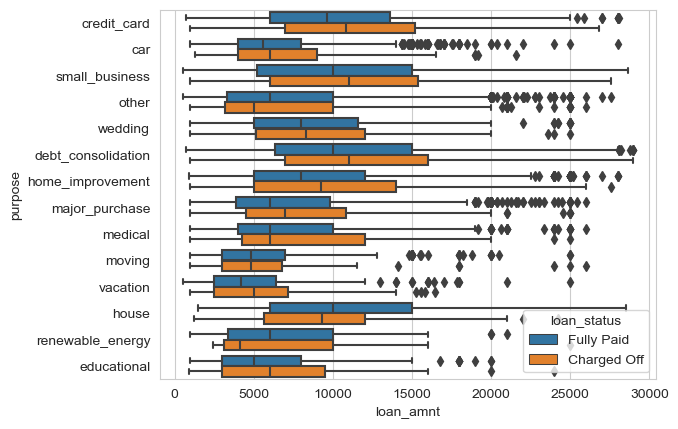

In [112]:
sns.boxplot(data=loan_data, x='loan_amnt', y='purpose', hue='loan_status', orient='h')

<Axes: xlabel='loan_amnt', ylabel='purpose'>

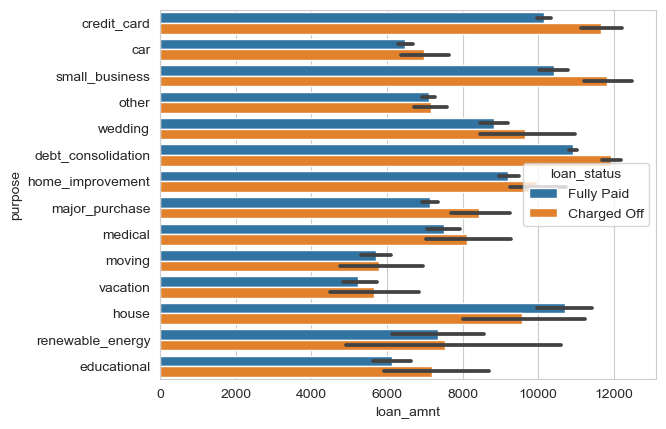

In [113]:
sns.barplot(data=loan_data, x='loan_amnt', y='purpose', hue='loan_status', orient='h')

From the above, we can see that those who take high amount loans for the purpose of credit_card, small_business or debt_consolidation defaults.

## Term In Month vs Interest Rate

<Axes: xlabel='term_in_months', ylabel='int_rate'>

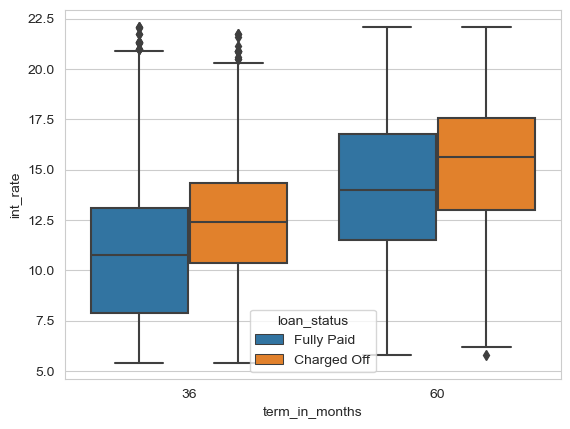

In [114]:
sns.boxplot(data=loan_data, x='term_in_months', y='int_rate', hue='loan_status')

<Axes: xlabel='term_in_months', ylabel='int_rate'>

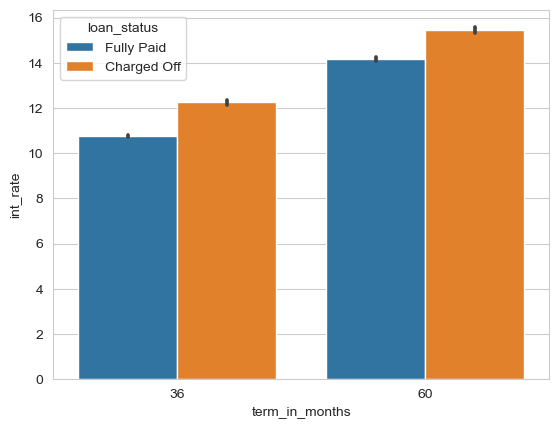

In [115]:
sns.barplot(data=loan_data, x='term_in_months', y='int_rate', hue='loan_status')

As the term in months increases, the interest rate also increases. The chances of loan being Charged Off increases with interest rate.

## Term In Months vs Annual Income

<Axes: xlabel='term_in_months', ylabel='annual_inc'>

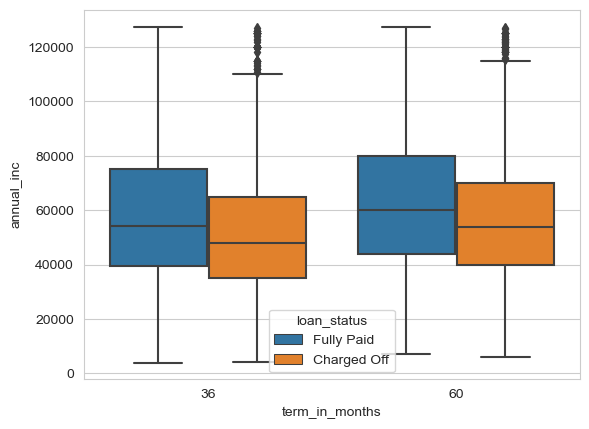

In [116]:
sns.boxplot(data=loan_data, x='term_in_months', y='annual_inc', hue='loan_status')

From the above plot we can see that the borrowers who opt for 60 months term have higher annual income. Also, those who Charged Off was having lesser annual income than those who Fully Paid.

## Term In Months vs Purpose

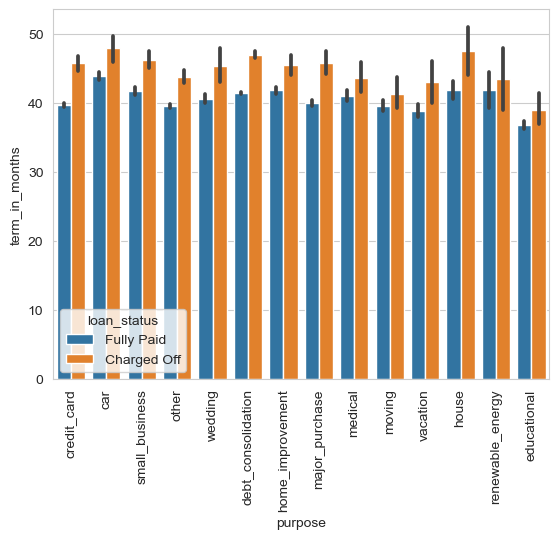

In [117]:
sns.barplot(data=loan_data, x='purpose', y='term_in_months', hue='loan_status')
plt.xticks(rotation=90)
plt.show()

The above plot shows that for each purpose, those who opt for higher term has more risk of defaulting than those who opt for lower term.

## Interest Rate vs Installment

<Axes: xlabel='installment_bkt', ylabel='int_rate'>

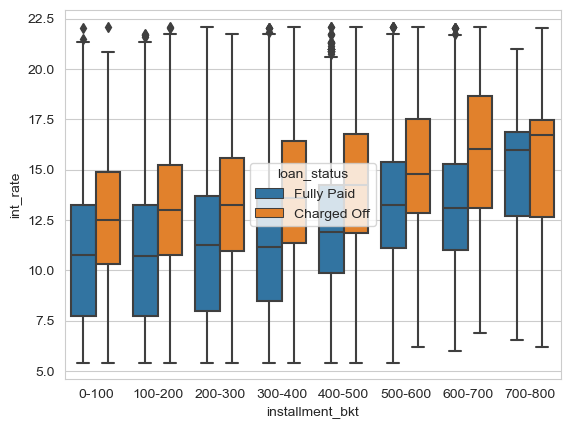

In [118]:
sns.boxplot(data=loan_data, x='installment_bkt', y='int_rate', hue='loan_status')

In the above plot, we can see that as the interest rate increaes, the installment also increases. In each installment group, those with higher interest rate have more probability of defaulting

## Interest Rate vs Home Ownership

<Axes: xlabel='home_ownership', ylabel='int_rate'>

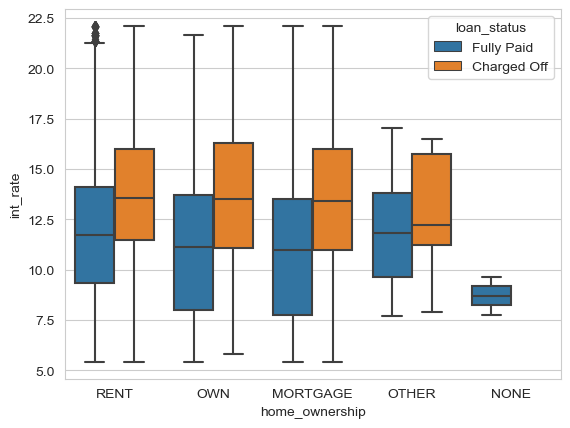

In [119]:
sns.boxplot(data=loan_data, x='home_ownership', y='int_rate', hue='loan_status')

Those who RENT their house seems to be having slightly higher median of interest rate. This high interest rate would be the reason of them defaulting. Also we can see that in same home_ownership, higher interest rate loans are the ones Charged Off

## Interest Rate vs Purpose

<Axes: xlabel='int_rate', ylabel='purpose'>

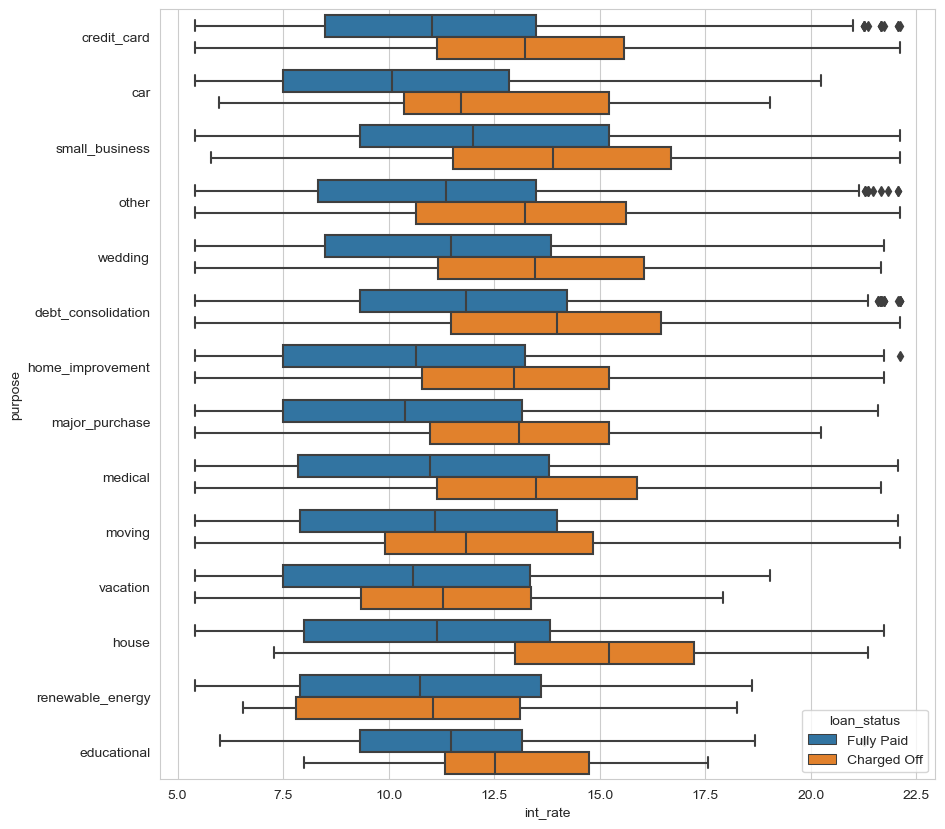

In [120]:
plt.figure(figsize=(10,10))
sns.boxplot(data=loan_data, y='purpose', x='int_rate', hue='loan_status', orient='h')

From above plot, we can see that house loans provided with high interest rate are having high risk of being Charged Off

## Interest Rate vs Issue Year

<Axes: xlabel='issue_year', ylabel='int_rate'>

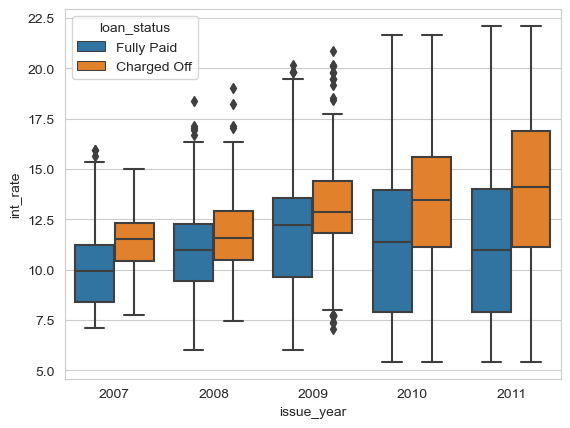

In [121]:
sns.boxplot(data=loan_data, x='issue_year', y='int_rate', hue='loan_status')

We can see that there is an increase in interest rate with year. Based on the increase in interest rate, the number of defaults also increased.

## Employment Length vs Home Ownership

<Axes: xlabel='emp_length', ylabel='home_ownership'>

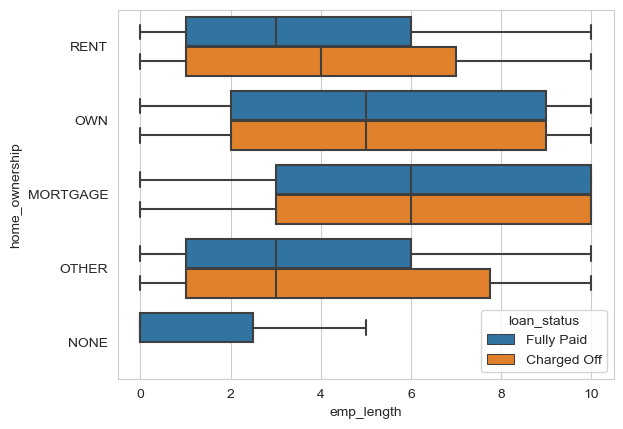

In [122]:
sns.boxplot(data=loan_data, y='home_ownership', x='emp_length', hue='loan_status', orient='h')

One observation made is that those who have MORTGAGEs are having higher employment length

# Bivariate Analysis Observations
* Higher loan amounts(12K+) for longer duration(60 months) have higher risk of Charging off.
* Interest rate increases as loan amounts increases. Higher interest rate and loan amounts have higher risk of Charging off.
* Installment amount increases as loan amount increases. Higher installment amount and loan amounts have higher risk of Charging Off.
* Borrowers with higher employment length opt for higher loan amounts. Higher loan amounts have higher risk of Charging off.
* OTHER home owners who take high loan amounts have higher risk of Charging Off.
* Borrowers who have lower annual income take lower loan amounts. Within each range of loan amounts, those with lower annual income have higher chance of Charging Off.
* Borrowers who take high loan amounts for the purpose of credit_card, small_business or debt_consolidation defaults.
* As interest rate increases chances of Charging off increases. Interest rate for longer term loans is higher than that of shorter term thereby making longer term loans to have higher chance of Charging off.
* For each purpose of the loan, those who opted for longer term have higher chance of defaulting.
* Installment increases as interest rate increases. Increase in installment/interest result in higher risk of defaulting.
* House loans provided with high interest rate have higher chance of being Charged Off.
* From 2007 to 2011 there is an increase in interest rate with year. Based on the increase in interest rate, the number of defaults also increased.